In [3]:
from Functions import General ,PlotFunctions , DataAcquisition
import time , os
from tqdm import tqdm
import pandas as pd
from datetime import datetime
import os
from bs4 import BeautifulSoup
import quandl
from time import mktime
import datetime as dt

from ipdb import set_trace

import numpy as np
path='c:\\Datasets\\intraQuarter\\'

In [8]:
df = DataAcquisition.GetStats(gathers= ['Profit Margin (ttm)',
                        'Total Debt/Equity (mrq)',
                        'Price/Book (mrq)',
                       'Return on Assets (ttm)'],
              path=path,
              limit=60) 

print('DF Shape - ', df.shape)

df.to_csv('df_stg.csv', index=False)

tickers= list(set(df.Ticker))
with open('tickers.txt','w') as f:
    f.write('\n'.join(tickers))

Profit Margin (ttm),Total Debt/Equity (mrq),Price/Book (mrq),Return on Assets (ttm)
Limit set to: 60


  0%|                                                                                          | 0/560 [00:00<?, ?it/s]

Start working with:  a


  0%|▏                                                                                 | 1/560 [00:01<09:43,  1.04s/it]

Start working with:  aa


  0%|▎                                                                                 | 2/560 [00:03<16:04,  1.73s/it]

Start working with:  aapl


  1%|▍                                                                                 | 3/560 [00:06<20:09,  2.17s/it]

Start working with:  abbv


  1%|▌                                                                                 | 4/560 [00:06<15:22,  1.66s/it]

Start working with:  abc


  1%|▋                                                                                 | 5/560 [00:07<14:10,  1.53s/it]

Start working with:  abt


  1%|▉                                                                                 | 6/560 [00:09<13:57,  1.51s/it]

Start working with:  ace


  1%|█                                                                                 | 7/560 [00:09<13:01,  1.41s/it]

Start working with:  aci


KeyboardInterrupt: 

In [9]:
df = pd.read_csv('df_stg.csv')
tickers = open('tickers.txt','r').read().splitlines()

In [10]:
df_list = []
for ticker in tickers:
    dates = df.loc[df['Ticker']==ticker,'UNIX']
    ticker_price_df = DataAcquisition.get_stock_perfomance(ticker,dates)
    df_list.append(ticker_price_df)

price_df = pd.concat(df_list, ignore_index=True)

res_df = pd.merge(df,price_df,on=['UNIX','Ticker'],how='inner')

res_df['Date'] = pd.to_datetime(res_df['Date'])

Getting Stock Price Data...



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aee 
Date:  2003-12-30
Quote Loaded



  7%|█████▉                                                                             | 1/14 [00:01<00:19,  1.49s/it]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2004-09-24


Quote Loaded


 14%|███████████▊                                                                       | 2/14 [00:01<00:10,  1.10it/s]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2004-11-02
Quote Loaded


 21%|█████████████████▊                                                                 | 3/14 [00:02<00:07,  1.38it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aee 
Date:  2005-03-07
Quote Loaded


 29%|███████████████████████▋                                                           | 4/14 [00:02<00:06,  1.55it/s]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2005-12-16
Quote Loaded


 36%|█████████████████████████████▋                                                     | 5/14 [00:02<00:05,  1.69it/s]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2006-01-10
Quote Loaded


 43%|███████████████████████████████████▌                                               | 6/14 [00:03<00:04,  1.83it/s]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2007-02-20
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 7/14 [00:03<00:03,  1.96it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aee 
Date:  2007-12-18
Quote Loaded


 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:04<00:03,  1.98it/s]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2008-01-23
Quote Loaded


 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:04<00:02,  2.06it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aee 
Date:  2009-02-24
Quote Loaded


 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:04<00:01,  2.14it/s]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2010-02-18
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:05<00:01,  2.18it/s]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2010-03-23
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:05<00:00,  2.22it/s]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2012-04-23
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:05<00:00,  2.26it/s]

Getting Original Date
Getting quots 
Ticker:  aee 
Date:  2013-05-15
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.33it/s]


Will save to file:  PriceVsSNP500_aee.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amt 
Date:  2003-10-28
Quote Loaded


  7%|█████▉                                                                             | 1/14 [00:00<00:04,  2.63it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2004-08-20
Quote Loaded


 14%|███████████▊                                                                       | 2/14 [00:00<00:04,  2.76it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2005-03-16
Quote Loaded


 21%|█████████████████▊                                                                 | 3/14 [00:01<00:03,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2005-04-05
Quote Loaded


 29%|███████████████████████▋                                                           | 4/14 [00:01<00:03,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2006-08-28
Quote Loaded


 36%|█████████████████████████████▋                                                     | 5/14 [00:01<00:02,  3.06it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2007-04-13
Quote Loaded


 43%|███████████████████████████████████▌                                               | 6/14 [00:01<00:02,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2008-01-07
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 7/14 [00:02<00:02,  3.15it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2008-01-23
Quote Loaded


 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:02<00:01,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2009-01-14
Quote Loaded


 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:02<00:01,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2009-09-25
Quote Loaded


 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:03<00:01,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2011-10-07
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:03<00:00,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2011-12-29
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:03<00:00,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2012-07-06
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:03<00:00,  3.26it/s]

Getting Original Date
Getting quots 
Ticker:  amt 
Date:  2013-05-15
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.29it/s]


Will save to file:  PriceVsSNP500_amt.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2003-10-02
Quote Loaded


  4%|███▏                                                                               | 1/26 [00:00<00:06,  4.15it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2004-04-27
Quote Loaded


  8%|██████▍                                                                            | 2/26 [00:00<00:06,  3.47it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amgn 
Date:  2004-06-21
Quote Loaded


 12%|█████████▌                                                                         | 3/26 [00:00<00:06,  3.41it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2004-10-15
Quote Loaded


 15%|████████████▊                                                                      | 4/26 [00:01<00:06,  3.55it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2005-02-07
Quote Loaded


 19%|███████████████▉                                                                   | 5/26 [00:01<00:06,  3.28it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amgn 
Date:  2005-04-05
Quote Loaded


 27%|██████████████████████▎                                                            | 7/26 [00:01<00:05,  3.77it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2006-04-21
Quote Loaded


 31%|█████████████████████████▌                                                         | 8/26 [00:02<00:04,  3.65it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amgn 
Date:  2007-01-16
Quote Loaded


 35%|████████████████████████████▋                                                      | 9/26 [00:02<00:04,  3.65it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2007-02-20
Quote Loaded


 38%|███████████████████████████████▌                                                  | 10/26 [00:02<00:04,  3.58it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2007-04-10
Quote Loaded


 42%|██████████████████████████████████▋                                               | 11/26 [00:03<00:04,  3.52it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2007-04-27
Quote Loaded


 46%|█████████████████████████████████████▊                                            | 12/26 [00:03<00:03,  3.51it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amgn 
Date:  2007-05-29
Quote Loaded


 50%|█████████████████████████████████████████                                         | 13/26 [00:03<00:03,  3.44it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2007-06-29
Quote Loaded


 54%|████████████████████████████████████████████▏                                     | 14/26 [00:04<00:03,  3.38it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2008-01-03
Quote Loaded


 58%|███████████████████████████████████████████████▎                                  | 15/26 [00:04<00:03,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2008-01-23
Quote Loaded


 62%|██████████████████████████████████████████████████▍                               | 16/26 [00:04<00:02,  3.41it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2008-12-02
Quote Loaded


 65%|█████████████████████████████████████████████████████▌                            | 17/26 [00:05<00:02,  3.36it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amgn 
Date:  2008-12-22
Quote Loaded


 69%|████████████████████████████████████████████████████████▊                         | 18/26 [00:05<00:02,  3.36it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2009-04-28
Quote Loaded


 73%|███████████████████████████████████████████████████████████▉                      | 19/26 [00:05<00:02,  3.40it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2011-09-02
Quote Loaded


 77%|███████████████████████████████████████████████████████████████                   | 20/26 [00:05<00:01,  3.36it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2011-11-03
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▏               | 21/26 [00:06<00:01,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2012-01-03
Quote Loaded


 85%|█████████████████████████████████████████████████████████████████████▍            | 22/26 [00:06<00:01,  3.27it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amgn 
Date:  2012-06-11
Quote Loaded


 88%|████████████████████████████████████████████████████████████████████████▌         | 23/26 [00:07<00:00,  3.25it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2013-02-06
Quote Loaded


 92%|███████████████████████████████████████████████████████████████████████████▋      | 24/26 [00:07<00:00,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2013-04-25
Quote Loaded


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 25/26 [00:07<00:00,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  amgn 
Date:  2013-05-21
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.26it/s]


Will save to file:  PriceVsSNP500_amgn.csv
Getting Stock Price Data...


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  alxn 
Date:  2005-01-24
Quote Loaded


 11%|█████████▎                                                                          | 1/9 [00:00<00:02,  3.96it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  alxn 
Date:  2005-03-08
Quote Loaded


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:02,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  alxn 
Date:  2009-02-13
Quote Loaded


 33%|████████████████████████████                                                        | 3/9 [00:01<00:02,  2.73it/s]

Getting Original Date
Getting quots 
Ticker:  alxn 
Date:  2010-05-10
Quote Loaded


 44%|█████████████████████████████████████▎                                              | 4/9 [00:01<00:01,  2.94it/s]

Getting Original Date
Getting quots 
Ticker:  alxn 
Date:  2011-07-22
Quote Loaded


 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:01<00:01,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  alxn 
Date:  2011-09-28
Quote Loaded


 67%|████████████████████████████████████████████████████████                            | 6/9 [00:01<00:00,  3.21it/s]

Getting Original Date
Getting quots 
Ticker:  alxn 
Date:  2012-11-07
Quote Loaded


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:02<00:00,  3.12it/s]

Getting Original Date
Getting quots 
Ticker:  alxn 
Date:  2013-02-06
Quote Loaded


 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:02<00:00,  3.20it/s]

Getting Original Date
Getting quots 
Ticker:  alxn 
Date:  2013-05-16
Quote Loaded


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.18it/s]


Will save to file:  PriceVsSNP500_alxn.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  aep 
Date:  2004-08-03
Quote Loaded


 10%|████████▎                                                                          | 1/10 [00:00<00:03,  2.79it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aep 
Date:  2004-10-12
Quote Loaded


 20%|████████████████▌                                                                  | 2/10 [00:00<00:02,  3.27it/s]

Getting Original Date
Getting quots 
Ticker:  aep 
Date:  2005-04-04
Quote Loaded


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  3.55it/s]

Getting Original Date
Getting quots 
Ticker:  aep 
Date:  2007-03-07
Quote Loaded


 40%|█████████████████████████████████▏                                                 | 4/10 [00:01<00:01,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  aep 
Date:  2007-04-10
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  3.41it/s]

Getting Original Date
Getting quots 
Ticker:  aep 
Date:  2008-01-23
Quote Loaded


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:01,  3.36it/s]

Getting Original Date
Getting quots 
Ticker:  aep 
Date:  2011-04-08
Quote Loaded


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:02<00:00,  3.42it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aep 
Date:  2011-11-14
Quote Loaded


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:02<00:00,  3.34it/s]

Getting Original Date
Getting quots 
Ticker:  aep 
Date:  2012-07-27
Quote Loaded


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:02<00:00,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  aep 
Date:  2013-04-25
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.27it/s]


Will save to file:  PriceVsSNP500_aep.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2003-11-17
Quote Loaded


  6%|████▉                                                                              | 1/17 [00:00<00:07,  2.28it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  agn 
Date:  2004-06-21
Quote Loaded


 12%|█████████▊                                                                         | 2/17 [00:00<00:05,  2.51it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2004-08-10
Quote Loaded


 18%|██████████████▋                                                                    | 3/17 [00:01<00:05,  2.56it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2004-11-02
Quote Loaded


 24%|███████████████████▌                                                               | 4/17 [00:01<00:04,  2.64it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2005-03-10
Quote Loaded


 29%|████████████████████████▍                                                          | 5/17 [00:01<00:04,  2.66it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2005-04-04
Quote Loaded


 35%|█████████████████████████████▎                                                     | 6/17 [00:02<00:04,  2.68it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2005-08-29
Quote Loaded


 41%|██████████████████████████████████▏                                                | 7/17 [00:02<00:03,  2.70it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2006-06-21
Quote Loaded


 47%|███████████████████████████████████████                                            | 8/17 [00:02<00:03,  2.81it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2007-02-20
Quote Loaded


 53%|███████████████████████████████████████████▉                                       | 9/17 [00:03<00:02,  2.77it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2008-01-23
Quote Loaded


 65%|█████████████████████████████████████████████████████                             | 11/17 [00:03<00:01,  3.04it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  agn 
Date:  2008-05-20
Quote Loaded


 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [00:04<00:01,  3.22it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  agn 
Date:  2012-08-14
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████▌              | 14/17 [00:04<00:00,  3.26it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2012-08-22
Quote Loaded


 88%|████████████████████████████████████████████████████████████████████████▎         | 15/17 [00:04<00:00,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  agn 
Date:  2013-04-22
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 16/17 [00:04<00:00,  3.28it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  agn 
Date:  2013-05-13
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:05<00:00,  3.25it/s]


Will save to file:  PriceVsSNP500_agn.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2003-11-11
Quote Loaded


  4%|██▉                                                                                | 1/28 [00:00<00:11,  2.36it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2004-11-30
Quote Loaded


  7%|█████▉                                                                             | 2/28 [00:00<00:10,  2.51it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2004-12-10
Quote Loaded


 11%|████████▉                                                                          | 3/28 [00:01<00:10,  2.44it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2005-02-10
Quote Loaded


 14%|███████████▊                                                                       | 4/28 [00:01<00:09,  2.47it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2005-04-04
Quote Loaded


 18%|██████████████▊                                                                    | 5/28 [00:01<00:09,  2.50it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2006-06-05
Quote Loaded


 25%|████████████████████▊                                                              | 7/28 [00:02<00:07,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2006-08-22
Quote Loaded


 29%|███████████████████████▋                                                           | 8/28 [00:02<00:06,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2006-08-22
Quote Loaded


 32%|██████████████████████████▋                                                        | 9/28 [00:03<00:06,  2.92it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2006-08-28
Quote Loaded


 36%|█████████████████████████████▎                                                    | 10/28 [00:03<00:06,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2006-11-02
Quote Loaded


 39%|████████████████████████████████▏                                                 | 11/28 [00:03<00:05,  2.93it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2006-11-14
Quote Loaded


 43%|███████████████████████████████████▏                                              | 12/28 [00:04<00:05,  2.93it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2006-12-04
Quote Loaded


 46%|██████████████████████████████████████                                            | 13/28 [00:04<00:05,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2007-03-14
Quote Loaded


 50%|█████████████████████████████████████████                                         | 14/28 [00:04<00:04,  2.96it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2007-05-08
Quote Loaded


 54%|███████████████████████████████████████████▉                                      | 15/28 [00:05<00:04,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2007-06-05
Quote Loaded


 57%|██████████████████████████████████████████████▊                                   | 16/28 [00:05<00:03,  3.02it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2007-07-06
Quote Loaded


 61%|█████████████████████████████████████████████████▊                                | 17/28 [00:05<00:03,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2008-04-07
Quote Loaded


 64%|████████████████████████████████████████████████████▋                             | 18/28 [00:05<00:03,  3.05it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2008-10-20
Quote Loaded


 68%|███████████████████████████████████████████████████████▋                          | 19/28 [00:06<00:02,  3.05it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2008-12-02
Quote Loaded


 71%|██████████████████████████████████████████████████████████▌                       | 20/28 [00:06<00:02,  3.03it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2008-12-23
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 21/28 [00:06<00:02,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2009-08-10
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▍                 | 22/28 [00:07<00:01,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2011-09-01
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████▎              | 23/28 [00:07<00:01,  3.11it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2011-11-08
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▎           | 24/28 [00:07<00:01,  3.14it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2012-02-29
Quote Loaded


 89%|█████████████████████████████████████████████████████████████████████████▏        | 25/28 [00:07<00:00,  3.17it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  acn 
Date:  2012-11-05
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▏     | 26/28 [00:08<00:00,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2013-04-23
Quote Loaded


 96%|███████████████████████████████████████████████████████████████████████████████   | 27/28 [00:09<00:00,  2.83it/s]

Getting Original Date
Getting quots 
Ticker:  acn 
Date:  2013-05-10
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:09<00:00,  2.84it/s]


Will save to file:  PriceVsSNP500_acn.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  arna 
Date:  2003-11-20
Quote Loaded


  9%|███████▌                                                                           | 1/11 [00:00<00:02,  4.33it/s]

Getting Original Date
Getting quots 
Ticker:  arna 
Date:  2004-10-14
Quote Loaded


 18%|███████████████                                                                    | 2/11 [00:00<00:02,  4.20it/s]

Getting Original Date
Getting quots 
Ticker:  arna 
Date:  2006-06-23
Quote Loaded


 27%|██████████████████████▋                                                            | 3/11 [00:00<00:02,  3.45it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  arna 
Date:  2006-10-30
Quote Loaded


 36%|██████████████████████████████▏                                                    | 4/11 [00:01<00:02,  3.39it/s]

Getting Original Date
Getting quots 
Ticker:  arna 
Date:  2007-03-07
Quote Loaded


 45%|█████████████████████████████████████▋                                             | 5/11 [00:01<00:01,  3.42it/s]

Getting Original Date
Getting quots 
Ticker:  arna 
Date:  2009-02-13
Quote Loaded


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:01<00:01,  3.31it/s]

Getting Original Date
Getting quots 
Ticker:  arna 
Date:  2009-04-03
Quote Loaded


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:02<00:01,  3.26it/s]

Getting Original Date
Getting quots 
Ticker:  arna 
Date:  2012-06-25
Quote Loaded


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:02<00:00,  3.24it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  arna 
Date:  2013-03-19
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [00:02<00:00,  3.54it/s]

Getting Original Date
Getting quots 
Ticker:  arna 
Date:  2013-05-07
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.60it/s]


Will save to file:  PriceVsSNP500_arna.csv
Getting Stock Price Data...


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  aon 
Date:  2011-08-18
Quote Loaded


 20%|████████████████▊                                                                   | 1/5 [00:00<00:00,  4.34it/s]

Getting Original Date
Getting quots 
Ticker:  aon 
Date:  2011-12-21
Quote Loaded


 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00,  3.70it/s]

Getting Original Date
Getting quots 
Ticker:  aon 
Date:  2011-12-28
Quote Loaded


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:00<00:00,  3.61it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aon 
Date:  2012-01-31
Quote Loaded


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:01<00:00,  3.42it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aon 
Date:  2012-01-30
Quote Loaded


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.38it/s]


Will save to file:  PriceVsSNP500_aon.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2004-05-12
Quote Loaded


  6%|████▌                                                                              | 1/18 [00:00<00:05,  2.93it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apa 
Date:  2004-09-21
Quote Loaded


 11%|█████████▏                                                                         | 2/18 [00:00<00:05,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2004-10-27
Quote Loaded


 17%|█████████████▊                                                                     | 3/18 [00:00<00:04,  3.40it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2005-02-04
Quote Loaded


 22%|██████████████████▍                                                                | 4/18 [00:01<00:04,  3.29it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2005-03-07
Quote Loaded


 28%|███████████████████████                                                            | 5/18 [00:01<00:04,  3.11it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apa 
Date:  2006-06-19
Quote Loaded


 33%|███████████████████████████▋                                                       | 6/18 [00:01<00:03,  3.09it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apa 
Date:  2006-08-15
Quote Loaded


 39%|████████████████████████████████▎                                                  | 7/18 [00:02<00:03,  3.14it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2007-02-20
Quote Loaded


 44%|████████████████████████████████████▉                                              | 8/18 [00:02<00:03,  3.22it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2007-04-05
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 9/18 [00:02<00:02,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2008-01-23
Quote Loaded


 56%|█████████████████████████████████████████████▌                                    | 10/18 [00:03<00:02,  3.20it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2009-11-23
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 12/18 [00:03<00:01,  3.49it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2011-12-30
Quote Loaded


 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:03<00:01,  3.71it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2012-02-29
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [00:04<00:00,  3.62it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2012-06-07
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:04<00:00,  3.65it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2013-04-23
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [00:04<00:00,  3.68it/s]

Getting Original Date
Getting quots 
Ticker:  apa 
Date:  2013-05-10
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.65it/s]


Will save to file:  PriceVsSNP500_apa.csv
Getting Stock Price Data...


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  bbry 
Date:  2013-04-22
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 33%|████████████████████████████                                                        | 1/3 [00:01<00:03,  1.64s/it]

Getting Original Date
Getting quots 
Ticker:  bbry 
Date:  2013-05-07
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:03<00:01,  1.77s/it]

Getting Original Date
Getting quots 
Ticker:  bbry 
Date:  2013-08-12
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.84s/it]


Will save to file:  PriceVsSNP500_bbry.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/22 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2004-11-23
Quote Loaded


  5%|███▊                                                                               | 1/22 [00:00<00:05,  4.06it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2005-01-26
Quote Loaded


  9%|███████▌                                                                           | 2/22 [00:00<00:06,  2.87it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apol 
Date:  2005-02-22
Quote Loaded


 14%|███████████▎                                                                       | 3/22 [00:01<00:06,  2.95it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2005-03-08
Quote Loaded


 18%|███████████████                                                                    | 4/22 [00:01<00:05,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2005-04-13
Quote Loaded


 23%|██████████████████▊                                                                | 5/22 [00:01<00:05,  2.97it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2005-05-27
Quote Loaded


 27%|██████████████████████▋                                                            | 6/22 [00:02<00:05,  2.98it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2005-09-28
Quote Loaded


 32%|██████████████████████████▍                                                        | 7/22 [00:02<00:04,  3.06it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apol 
Date:  2006-08-21
Quote Loaded


 36%|██████████████████████████████▏                                                    | 8/22 [00:02<00:04,  3.13it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2007-02-20
Quote Loaded


 41%|█████████████████████████████████▉                                                 | 9/22 [00:02<00:04,  3.11it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apol 
Date:  2007-04-10
Quote Loaded


 45%|█████████████████████████████████████▎                                            | 10/22 [00:03<00:03,  3.15it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2007-06-04
Quote Loaded


 55%|████████████████████████████████████████████▋                                     | 12/22 [00:03<00:02,  3.42it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2007-07-06
Quote Loaded


 59%|████████████████████████████████████████████████▍                                 | 13/22 [00:03<00:02,  3.45it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2007-12-26
Quote Loaded


 64%|████████████████████████████████████████████████████▏                             | 14/22 [00:04<00:02,  3.40it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2008-01-23
Quote Loaded


 68%|███████████████████████████████████████████████████████▉                          | 15/22 [00:04<00:02,  3.41it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apol 
Date:  2009-03-23
Quote Loaded


 73%|███████████████████████████████████████████████████████████▋                      | 16/22 [00:04<00:01,  3.43it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2011-07-07
Quote Loaded


 77%|███████████████████████████████████████████████████████████████▎                  | 17/22 [00:05<00:01,  3.40it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apol 
Date:  2011-09-27
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████               | 18/22 [00:05<00:01,  3.41it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2011-11-08
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▊           | 19/22 [00:05<00:00,  3.44it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2013-02-06
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▌       | 20/22 [00:05<00:00,  3.39it/s]

Getting Original Date
Getting quots 
Ticker:  apol 
Date:  2013-04-22
Quote Loaded


 95%|██████████████████████████████████████████████████████████████████████████████▎   | 21/22 [00:06<00:00,  3.40it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apol 
Date:  2013-05-13
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:06<00:00,  3.37it/s]


Will save to file:  PriceVsSNP500_apol.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  an 
Date:  2003-10-28
Quote Loaded


  5%|████▏                                                                              | 1/20 [00:00<00:05,  3.66it/s]

Getting Original Date
Getting quots 
Ticker:  an 
Date:  2004-09-17
Quote Loaded


 10%|████████▎                                                                          | 2/20 [00:00<00:04,  3.68it/s]

Getting Original Date
Getting quots 
Ticker:  an 
Date:  2005-04-05
Quote Loaded


 15%|████████████▍                                                                      | 3/20 [00:00<00:05,  3.36it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  an 
Date:  2007-02-20
Quote Loaded


 25%|████████████████████▊                                                              | 5/20 [00:01<00:03,  3.75it/s]

Getting Original Date
Getting quots 
Ticker:  an 
Date:  2008-01-23
Quote Loaded


 30%|████████████████████████▉                                                          | 6/20 [00:01<00:04,  3.35it/s]

Getting Original Date
Getting quots 
Ticker:  an 
Date:  2008-02-15
Quote Loaded


 35%|█████████████████████████████                                                      | 7/20 [00:02<00:03,  3.32it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  an 
Date:  2008-12-09
Quote Loaded


 40%|█████████████████████████████████▏                                                 | 8/20 [00:02<00:03,  3.32it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  an 
Date:  2009-02-09
Quote Loaded


 45%|█████████████████████████████████████▎                                             | 9/20 [00:02<00:03,  3.37it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  an 
Date:  2011-03-15
Quote Loaded


 50%|█████████████████████████████████████████                                         | 10/20 [00:02<00:02,  3.38it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  an 
Date:  2011-05-23
Quote Loaded


 55%|█████████████████████████████████████████████                                     | 11/20 [00:03<00:02,  3.36it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  an 
Date:  2011-06-07
Quote Loaded


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:03<00:02,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  an 
Date:  2011-06-22
Quote Loaded


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:03<00:02,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  an 
Date:  2011-06-29
Quote Loaded


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:04<00:01,  3.44it/s]

Getting Original Date
Getting quots 
Ticker:  an 
Date:  2011-08-16
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:04<00:01,  3.49it/s]

Getting Original Date
Getting quots 
Ticker:  an 
Date:  2011-11-16
Quote Loaded


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:04<00:01,  3.43it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  an 
Date:  2012-02-06
Quote Loaded


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:05<00:00,  3.39it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  an 
Date:  2012-02-14
Quote Loaded


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:05<00:00,  3.37it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  an 
Date:  2012-07-31
Quote Loaded


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:05<00:00,  3.31it/s]

Getting Original Date
Getting quots 
Ticker:  an 
Date:  2013-05-14
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.29it/s]


Will save to file:  PriceVsSNP500_an.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2004-09-24
Quote Loaded


  7%|█████▌                                                                             | 1/15 [00:00<00:04,  2.98it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  all 
Date:  2005-02-01
Quote Loaded


 13%|███████████                                                                        | 2/15 [00:00<00:03,  3.50it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2005-02-04
Quote Loaded


 20%|████████████████▌                                                                  | 3/15 [00:00<00:03,  3.76it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  all 
Date:  2007-01-16
Quote Loaded


 27%|██████████████████████▏                                                            | 4/15 [00:01<00:02,  3.80it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2007-02-22
Quote Loaded


 33%|███████████████████████████▋                                                       | 5/15 [00:01<00:02,  3.63it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2007-04-10
Quote Loaded


 40%|█████████████████████████████████▏                                                 | 6/15 [00:01<00:02,  3.73it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2008-01-23
Quote Loaded


 47%|██████████████████████████████████████▋                                            | 7/15 [00:01<00:02,  3.59it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2011-05-05
Quote Loaded


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:02<00:01,  3.65it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2011-07-14
Quote Loaded


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:02<00:01,  3.57it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2011-09-12
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:02<00:01,  3.57it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2011-10-28
Quote Loaded


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:03<00:01,  3.62it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  all 
Date:  2012-03-12
Quote Loaded


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:03<00:00,  3.64it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2012-08-20
Quote Loaded


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:03<00:00,  3.58it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2013-04-23
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:03<00:00,  3.57it/s]

Getting Original Date
Getting quots 
Ticker:  all 
Date:  2013-05-09
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.61it/s]


Will save to file:  PriceVsSNP500_all.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2003-10-03
Quote Loaded


  8%|██████▍                                                                            | 1/13 [00:00<00:04,  2.77it/s]

Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2003-12-15
Quote Loaded


 15%|████████████▊                                                                      | 2/13 [00:00<00:03,  3.27it/s]

Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2004-08-04
Quote Loaded


 23%|███████████████████▏                                                               | 3/13 [00:00<00:02,  3.55it/s]

Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2004-10-26
Quote Loaded


 31%|█████████████████████████▌                                                         | 4/13 [00:01<00:02,  3.38it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aes 
Date:  2004-12-06
Quote Loaded


 38%|███████████████████████████████▉                                                   | 5/13 [00:01<00:02,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2005-02-18
Quote Loaded


 46%|██████████████████████████████████████▎                                            | 6/13 [00:01<00:02,  3.29it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2007-04-11
Quote Loaded


 62%|███████████████████████████████████████████████████                                | 8/13 [00:02<00:01,  3.82it/s]

Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2008-01-23
Quote Loaded


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:02<00:01,  3.88it/s]

Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2008-04-23
Quote Loaded


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:02<00:00,  3.71it/s]

Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2011-05-23
Quote Loaded


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:03<00:00,  3.65it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aes 
Date:  2011-07-25
Quote Loaded


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:03<00:00,  3.66it/s]

Getting Original Date
Getting quots 
Ticker:  aes 
Date:  2013-05-23
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  3.63it/s]


Will save to file:  PriceVsSNP500_aes.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2004-01-30
Quote Loaded


  6%|████▌                                                                              | 1/18 [00:00<00:04,  3.86it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2004-04-13
Quote Loaded


 11%|█████████▏                                                                         | 2/18 [00:00<00:04,  3.29it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2004-12-13
Quote Loaded


 17%|█████████████▊                                                                     | 3/18 [00:00<00:04,  3.29it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  a 
Date:  2005-01-25
Quote Loaded


 22%|██████████████████▍                                                                | 4/18 [00:01<00:04,  3.34it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2006-01-09
Quote Loaded


 28%|███████████████████████                                                            | 5/18 [00:01<00:03,  3.39it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2006-06-21
Quote Loaded


 33%|███████████████████████████▋                                                       | 6/18 [00:01<00:03,  3.27it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  a 
Date:  2006-08-22
Quote Loaded


 39%|████████████████████████████████▎                                                  | 7/18 [00:02<00:03,  3.09it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2007-02-20
Quote Loaded


 44%|████████████████████████████████████▉                                              | 8/18 [00:02<00:03,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2007-04-12
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 9/18 [00:02<00:02,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2008-01-23
Quote Loaded


 56%|█████████████████████████████████████████████▌                                    | 10/18 [00:03<00:02,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2008-02-14
Quote Loaded


 61%|██████████████████████████████████████████████████                                | 11/18 [00:03<00:02,  3.19it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  a 
Date:  2008-04-29
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 12/18 [00:03<00:01,  3.16it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  a 
Date:  2008-12-08
Quote Loaded


 72%|███████████████████████████████████████████████████████████▏                      | 13/18 [00:04<00:01,  3.15it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  a 
Date:  2009-08-03
Quote Loaded


 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:04<00:01,  3.20it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2011-08-02
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [00:04<00:00,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2011-11-08
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:05<00:00,  3.18it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2013-05-14
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [00:05<00:00,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  a 
Date:  2013-09-06
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.14it/s]


Will save to file:  PriceVsSNP500_a.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2004-06-22
Quote Loaded


  6%|████▉                                                                              | 1/17 [00:00<00:03,  4.13it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2004-09-17
Quote Loaded


 12%|█████████▊                                                                         | 2/17 [00:00<00:04,  3.55it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2004-10-13
Quote Loaded


 18%|██████████████▋                                                                    | 3/17 [00:00<00:03,  3.74it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2004-12-09
Quote Loaded


 24%|███████████████████▌                                                               | 4/17 [00:01<00:03,  3.79it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2005-02-04
Quote Loaded


 29%|████████████████████████▍                                                          | 5/17 [00:01<00:03,  3.54it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2005-05-02
Quote Loaded


 35%|█████████████████████████████▎                                                     | 6/17 [00:01<00:03,  3.49it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2005-08-29
Quote Loaded


 41%|██████████████████████████████████▏                                                | 7/17 [00:02<00:02,  3.43it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2005-09-07
Quote Loaded


 47%|███████████████████████████████████████                                            | 8/17 [00:02<00:02,  3.40it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  altr 
Date:  2007-02-26
Quote Loaded


 53%|███████████████████████████████████████████▉                                       | 9/17 [00:02<00:02,  3.31it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2008-01-23
Quote Loaded


 59%|████████████████████████████████████████████████▏                                 | 10/17 [00:02<00:02,  3.38it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2008-02-20
Quote Loaded


 65%|█████████████████████████████████████████████████████                             | 11/17 [00:03<00:01,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2008-12-12
Quote Loaded


 71%|█████████████████████████████████████████████████████████▉                        | 12/17 [00:03<00:01,  3.34it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2008-12-22
Quote Loaded


 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [00:03<00:01,  3.30it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  altr 
Date:  2011-10-24
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████▌              | 14/17 [00:04<00:00,  3.33it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2012-03-09
Quote Loaded


 88%|████████████████████████████████████████████████████████████████████████▎         | 15/17 [00:04<00:00,  3.33it/s]

Getting Original Date
Getting quots 
Ticker:  altr 
Date:  2013-02-06
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 16/17 [00:04<00:00,  3.37it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  altr 
Date:  2013-06-03
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:05<00:00,  3.38it/s]


Will save to file:  PriceVsSNP500_altr.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/32 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adbe 
Date:  2004-01-26
Quote Loaded


  3%|██▌                                                                                | 1/32 [00:00<00:09,  3.17it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adbe 
Date:  2004-08-23
Quote Loaded


  6%|█████▏                                                                             | 2/32 [00:00<00:09,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2004-11-12
Quote Loaded


  9%|███████▊                                                                           | 3/32 [00:00<00:09,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2005-02-07
Quote Loaded


 12%|██████████▍                                                                        | 4/32 [00:01<00:08,  3.15it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2005-04-05
Quote Loaded


 16%|████████████▉                                                                      | 5/32 [00:01<00:09,  2.96it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2005-08-31
Quote Loaded


 19%|███████████████▌                                                                   | 6/32 [00:02<00:08,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2006-02-21
Quote Loaded


 22%|██████████████████▏                                                                | 7/32 [00:02<00:08,  2.87it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2006-04-07
Quote Loaded


 25%|████████████████████▊                                                              | 8/32 [00:02<00:08,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2006-06-23
Quote Loaded


 28%|███████████████████████▎                                                           | 9/32 [00:03<00:08,  2.85it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2006-11-28
Quote Loaded


 31%|█████████████████████████▋                                                        | 10/32 [00:03<00:07,  2.85it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adbe 
Date:  2007-01-29
Quote Loaded


 34%|████████████████████████████▏                                                     | 11/32 [00:04<00:07,  2.72it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2007-03-09
Quote Loaded


 38%|██████████████████████████████▊                                                   | 12/32 [00:04<00:07,  2.72it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2007-03-15
Quote Loaded


 41%|█████████████████████████████████▎                                                | 13/32 [00:04<00:06,  2.73it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2007-03-28
Quote Loaded


 44%|███████████████████████████████████▉                                              | 14/32 [00:05<00:06,  2.75it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adbe 
Date:  2007-04-30
Quote Loaded


 47%|██████████████████████████████████████▍                                           | 15/32 [00:05<00:06,  2.73it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2007-04-30
Quote Loaded


 50%|█████████████████████████████████████████                                         | 16/32 [00:05<00:05,  2.79it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2007-05-01
Quote Loaded


 53%|███████████████████████████████████████████▌                                      | 17/32 [00:06<00:05,  2.80it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2007-05-30
Quote Loaded


 56%|██████████████████████████████████████████████▏                                   | 18/32 [00:06<00:04,  2.85it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2007-05-31
Quote Loaded


 59%|████████████████████████████████████████████████▋                                 | 19/32 [00:06<00:04,  2.89it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adbe 
Date:  2007-07-02
Quote Loaded


 62%|███████████████████████████████████████████████████▎                              | 20/32 [00:06<00:04,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2007-10-18
Quote Loaded


 66%|█████████████████████████████████████████████████████▊                            | 21/32 [00:07<00:03,  2.78it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2008-01-23
Quote Loaded


 69%|████████████████████████████████████████████████████████▍                         | 22/32 [00:07<00:03,  2.82it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2008-12-04
Quote Loaded


 72%|██████████████████████████████████████████████████████████▉                       | 23/32 [00:08<00:03,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2008-12-05
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 24/32 [00:08<00:02,  2.90it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2008-12-17
Quote Loaded


 78%|████████████████████████████████████████████████████████████████                  | 25/32 [00:08<00:02,  2.91it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adbe 
Date:  2008-12-22
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▋               | 26/32 [00:08<00:02,  2.91it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adbe 
Date:  2011-04-25
Quote Loaded


 84%|█████████████████████████████████████████████████████████████████████▏            | 27/32 [00:09<00:01,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2011-08-05
Quote Loaded


 88%|███████████████████████████████████████████████████████████████████████▊          | 28/32 [00:09<00:01,  2.95it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adbe 
Date:  2011-09-27
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▎       | 29/32 [00:09<00:01,  2.98it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2011-10-18
Quote Loaded


 94%|████████████████████████████████████████████████████████████████████████████▉     | 30/32 [00:10<00:00,  2.97it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adbe 
Date:  2012-03-26
Quote Loaded


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 31/32 [00:10<00:00,  2.97it/s]

Getting Original Date
Getting quots 
Ticker:  adbe 
Date:  2012-07-02
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:10<00:00,  2.99it/s]


Will save to file:  PriceVsSNP500_adbe.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2003-10-03
Quote Loaded


  6%|████▌                                                                              | 1/18 [00:00<00:04,  3.75it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adsk 
Date:  2004-06-21
Quote Loaded


 11%|█████████▏                                                                         | 2/18 [00:00<00:04,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2004-08-03
Quote Loaded


 17%|█████████████▊                                                                     | 3/18 [00:00<00:04,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2005-02-25
Quote Loaded


 22%|██████████████████▍                                                                | 4/18 [00:01<00:04,  3.35it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2005-04-19
Quote Loaded


 28%|███████████████████████                                                            | 5/18 [00:01<00:04,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2007-03-09
Quote Loaded


 33%|███████████████████████████▋                                                       | 6/18 [00:01<00:03,  3.35it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adsk 
Date:  2007-03-13
Quote Loaded


 39%|████████████████████████████████▎                                                  | 7/18 [00:02<00:03,  3.24it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adsk 
Date:  2007-04-09
Quote Loaded


 44%|████████████████████████████████████▉                                              | 8/18 [00:02<00:03,  3.28it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2007-05-29
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 9/18 [00:02<00:02,  3.34it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2007-12-24
Quote Loaded


 56%|█████████████████████████████████████████████▌                                    | 10/18 [00:03<00:02,  3.31it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2008-01-23
Quote Loaded


 61%|██████████████████████████████████████████████████                                | 11/18 [00:03<00:02,  3.36it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adsk 
Date:  2008-03-04
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 12/18 [00:03<00:01,  3.41it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2009-06-18
Quote Loaded


 72%|███████████████████████████████████████████████████████████▏                      | 13/18 [00:03<00:01,  3.38it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adsk 
Date:  2012-06-11
Quote Loaded


 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:04<00:01,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2012-08-28
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [00:04<00:00,  3.21it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2012-11-07
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:05<00:00,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2013-02-06
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [00:05<00:00,  3.13it/s]

Getting Original Date
Getting quots 
Ticker:  adsk 
Date:  2013-05-14
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.06it/s]


Will save to file:  PriceVsSNP500_adsk.csv
Getting Stock Price Data...


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  adt 
Date:  2013-04-23
Quote Loaded


 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.76it/s]

Getting Original Date
Getting quots 
Ticker:  adt 
Date:  2013-05-09
Quote Loaded


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.43it/s]


Will save to file:  PriceVsSNP500_adt.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2004-01-15
Quote Loaded


  3%|██▎                                                                                | 1/36 [00:00<00:12,  2.82it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2004-04-14
Quote Loaded


  6%|████▌                                                                              | 2/36 [00:00<00:10,  3.20it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  akam 
Date:  2004-06-21
Quote Loaded


  8%|██████▉                                                                            | 3/36 [00:00<00:09,  3.40it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  akam 
Date:  2004-08-24
Quote Loaded


 11%|█████████▏                                                                         | 4/36 [00:01<00:09,  3.27it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2004-10-14
Quote Loaded


 14%|███████████▌                                                                       | 5/36 [00:01<00:09,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2005-04-05
Quote Loaded


 17%|█████████████▊                                                                     | 6/36 [00:01<00:09,  3.27it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  akam 
Date:  2006-02-21
Quote Loaded


 19%|████████████████▏                                                                  | 7/36 [00:02<00:08,  3.36it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2006-04-07
Quote Loaded


 22%|██████████████████▍                                                                | 8/36 [00:02<00:08,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2006-04-12
Quote Loaded


 25%|████████████████████▊                                                              | 9/36 [00:02<00:08,  3.26it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2006-06-29
Quote Loaded


 28%|██████████████████████▊                                                           | 10/36 [00:03<00:07,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2006-11-30
Quote Loaded


 31%|█████████████████████████                                                         | 11/36 [00:03<00:07,  3.25it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  akam 
Date:  2007-02-13
Quote Loaded


 36%|█████████████████████████████▌                                                    | 13/36 [00:03<00:06,  3.45it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2007-03-08
Quote Loaded


 42%|██████████████████████████████████▏                                               | 15/36 [00:04<00:05,  3.65it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2007-03-16
Quote Loaded


 44%|████████████████████████████████████▍                                             | 16/36 [00:04<00:05,  3.69it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2007-04-04
Quote Loaded


 47%|██████████████████████████████████████▋                                           | 17/36 [00:04<00:05,  3.72it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  akam 
Date:  2007-05-01
Quote Loaded


 50%|█████████████████████████████████████████                                         | 18/36 [00:04<00:04,  3.67it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  akam 
Date:  2007-04-30
Quote Loaded


 53%|███████████████████████████████████████████▎                                      | 19/36 [00:05<00:04,  3.64it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2007-04-30
Quote Loaded


 56%|█████████████████████████████████████████████▌                                    | 20/36 [00:05<00:04,  3.65it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2007-05-01
Quote Loaded


 58%|███████████████████████████████████████████████▊                                  | 21/36 [00:05<00:04,  3.62it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2007-06-01
Quote Loaded


 61%|██████████████████████████████████████████████████                                | 22/36 [00:06<00:03,  3.62it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2007-07-02
Quote Loaded


 64%|████████████████████████████████████████████████████▍                             | 23/36 [00:06<00:03,  3.59it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2007-10-11
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 24/36 [00:06<00:03,  3.57it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2007-12-13
Quote Loaded


 69%|████████████████████████████████████████████████████████▉                         | 25/36 [00:07<00:03,  3.55it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2008-01-23
Quote Loaded


 72%|███████████████████████████████████████████████████████████▏                      | 26/36 [00:07<00:02,  3.56it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  akam 
Date:  2008-11-04
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 27/36 [00:07<00:02,  3.52it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2008-12-19
Quote Loaded


 78%|███████████████████████████████████████████████████████████████▊                  | 28/36 [00:08<00:02,  3.49it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  akam 
Date:  2009-02-09
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████                | 29/36 [00:08<00:02,  3.49it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2011-09-26
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 30/36 [00:08<00:01,  3.50it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2012-03-20
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 32/36 [00:08<00:01,  3.57it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  akam 
Date:  2012-07-03
Quote Loaded


 92%|███████████████████████████████████████████████████████████████████████████▏      | 33/36 [00:09<00:00,  3.56it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2012-08-31
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 34/36 [00:09<00:00,  3.56it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2013-02-06
Quote Loaded


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 35/36 [00:09<00:00,  3.57it/s]

Getting Original Date
Getting quots 
Ticker:  akam 
Date:  2013-05-21
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:10<00:00,  3.57it/s]


Will save to file:  PriceVsSNP500_akam.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  aph 
Date:  2004-01-07
Quote Loaded


  8%|██████▍                                                                            | 1/13 [00:00<00:03,  3.82it/s]

Getting Original Date
Getting quots 
Ticker:  aph 
Date:  2004-05-21
Quote Loaded


 15%|████████████▊                                                                      | 2/13 [00:00<00:02,  4.07it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aph 
Date:  2004-11-29
Quote Loaded


 23%|███████████████████▏                                                               | 3/13 [00:00<00:02,  3.57it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aph 
Date:  2005-01-25
Quote Loaded


 31%|█████████████████████████▌                                                         | 4/13 [00:01<00:02,  3.64it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aph 
Date:  2005-03-07
Quote Loaded


 38%|███████████████████████████████▉                                                   | 5/13 [00:01<00:02,  3.38it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aph 
Date:  2006-02-06
Quote Loaded


 46%|██████████████████████████████████████▎                                            | 6/13 [00:01<00:02,  3.40it/s]

Getting Original Date
Getting quots 
Ticker:  aph 
Date:  2007-03-27
Quote Loaded


 54%|████████████████████████████████████████████▋                                      | 7/13 [00:02<00:01,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  aph 
Date:  2007-04-04
Quote Loaded


 62%|███████████████████████████████████████████████████                                | 8/13 [00:02<00:01,  3.29it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aph 
Date:  2008-06-30
Quote Loaded


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:02<00:00,  3.64it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aph 
Date:  2009-01-05
Quote Loaded


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:03<00:00,  3.56it/s]

Getting Original Date
Getting quots 
Ticker:  aph 
Date:  2013-04-22
Quote Loaded


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:03<00:00,  3.58it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aph 
Date:  2013-05-14
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  3.47it/s]


Will save to file:  PriceVsSNP500_aph.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  bax 
Date:  2003-10-13
Quote Loaded


  7%|█████▉                                                                             | 1/14 [00:00<00:04,  2.95it/s]

Getting Original Date
Getting quots 
Ticker:  bax 
Date:  2004-05-11
Quote Loaded


 14%|███████████▊                                                                       | 2/14 [00:00<00:03,  3.28it/s]

Getting Original Date
Getting quots 
Ticker:  bax 
Date:  2004-12-16
Quote Loaded


 21%|█████████████████▊                                                                 | 3/14 [00:00<00:03,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  bax 
Date:  2005-04-12
Quote Loaded


 29%|███████████████████████▋                                                           | 4/14 [00:01<00:02,  3.38it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bax 
Date:  2005-10-17
Quote Loaded


 43%|███████████████████████████████████▌                                               | 6/14 [00:01<00:01,  4.01it/s]

Getting Original Date
Getting quots 
Ticker:  bax 
Date:  2007-03-23
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 7/14 [00:01<00:01,  3.76it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bax 
Date:  2009-01-12
Quote Loaded


 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:02<00:01,  3.66it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bax 
Date:  2009-06-16
Quote Loaded


 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:02<00:01,  3.45it/s]

Getting Original Date
Getting quots 
Ticker:  bax 
Date:  2011-12-23
Quote Loaded


 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:03<00:01,  3.33it/s]

Getting Original Date
Getting quots 
Ticker:  bax 
Date:  2011-12-30
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:03<00:00,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  bax 
Date:  2012-04-27
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:03<00:00,  3.11it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bax 
Date:  2012-07-02
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:04<00:00,  3.06it/s]

Getting Original Date
Getting quots 
Ticker:  bax 
Date:  2013-05-08
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.08it/s]


Will save to file:  PriceVsSNP500_bax.csv
Getting Stock Price Data...


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  act 
Date:  2013-05-13
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.02s/it]


Will save to file:  PriceVsSNP500_act.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2003-10-03
Quote Loaded


  4%|███                                                                                | 1/27 [00:00<00:06,  3.75it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2004-01-05
Quote Loaded


  7%|██████▏                                                                            | 2/27 [00:00<00:06,  3.78it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2004-01-16
Quote Loaded


 11%|█████████▏                                                                         | 3/27 [00:00<00:07,  3.28it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2004-06-22
Quote Loaded


 15%|████████████▎                                                                      | 4/27 [00:01<00:06,  3.34it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2004-08-27
Quote Loaded


 19%|███████████████▎                                                                   | 5/27 [00:01<00:06,  3.35it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  atvi 
Date:  2004-09-28
Quote Loaded


 22%|██████████████████▍                                                                | 6/27 [00:01<00:06,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2004-10-13
Quote Loaded


 26%|█████████████████████▌                                                             | 7/27 [00:02<00:05,  3.38it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2004-10-14
Quote Loaded


 30%|████████████████████████▌                                                          | 8/27 [00:02<00:05,  3.41it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2005-04-19
Quote Loaded


 37%|██████████████████████████████▎                                                   | 10/27 [00:02<00:04,  3.74it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2006-02-17
Quote Loaded


 41%|█████████████████████████████████▍                                                | 11/27 [00:03<00:04,  3.62it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2006-04-21
Quote Loaded


 44%|████████████████████████████████████▍                                             | 12/27 [00:03<00:04,  3.49it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  atvi 
Date:  2006-12-19
Quote Loaded


 48%|███████████████████████████████████████▍                                          | 13/27 [00:03<00:04,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2007-01-17
Quote Loaded


 52%|██████████████████████████████████████████▌                                       | 14/27 [00:04<00:03,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2007-02-21
Quote Loaded


 56%|█████████████████████████████████████████████▌                                    | 15/27 [00:04<00:03,  3.35it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2007-04-05
Quote Loaded


 59%|████████████████████████████████████████████████▌                                 | 16/27 [00:04<00:03,  3.36it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  atvi 
Date:  2007-06-18
Quote Loaded


 63%|███████████████████████████████████████████████████▋                              | 17/27 [00:05<00:03,  3.33it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2007-10-16
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 18/27 [00:05<00:02,  3.35it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2008-12-18
Quote Loaded


 70%|█████████████████████████████████████████████████████████▋                        | 19/27 [00:05<00:02,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2009-01-26
Quote Loaded


 74%|████████████████████████████████████████████████████████████▋                     | 20/27 [00:06<00:02,  3.30it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2011-11-04
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▊               | 22/27 [00:06<00:01,  3.46it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2012-01-03
Quote Loaded


 85%|█████████████████████████████████████████████████████████████████████▊            | 23/27 [00:06<00:01,  3.41it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2012-03-16
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 24/27 [00:07<00:00,  3.40it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2013-02-06
Quote Loaded


 93%|███████████████████████████████████████████████████████████████████████████▉      | 25/27 [00:07<00:00,  3.40it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2013-04-22
Quote Loaded


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 26/27 [00:07<00:00,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  atvi 
Date:  2013-05-21
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:08<00:00,  3.35it/s]


Will save to file:  PriceVsSNP500_atvi.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2004-08-03
Quote Loaded


 11%|█████████▏                                                                         | 2/18 [00:00<00:03,  4.91it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2004-11-30
Quote Loaded


 17%|█████████████▊                                                                     | 3/18 [00:00<00:03,  4.23it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2005-02-04
Quote Loaded


 22%|██████████████████▍                                                                | 4/18 [00:01<00:03,  3.67it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2005-04-08
Quote Loaded


 28%|███████████████████████                                                            | 5/18 [00:01<00:03,  3.50it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2005-09-23
Quote Loaded


 33%|███████████████████████████▋                                                       | 6/18 [00:01<00:03,  3.40it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2006-01-11
Quote Loaded


 39%|████████████████████████████████▎                                                  | 7/18 [00:02<00:03,  3.39it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aet 
Date:  2006-05-08
Quote Loaded


 44%|████████████████████████████████████▉                                              | 8/18 [00:02<00:03,  3.21it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2007-01-25
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 9/18 [00:02<00:02,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2007-02-20
Quote Loaded


 56%|█████████████████████████████████████████████▌                                    | 10/18 [00:03<00:02,  3.13it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2008-01-23
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 12/18 [00:03<00:01,  3.38it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2008-02-22
Quote Loaded


 72%|███████████████████████████████████████████████████████████▏                      | 13/18 [00:03<00:01,  3.38it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aet 
Date:  2008-11-04
Quote Loaded


 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:04<00:01,  3.27it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2009-10-02
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [00:04<00:00,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2009-10-15
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:05<00:00,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2012-12-19
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [00:05<00:00,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  aet 
Date:  2013-06-05
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.11it/s]


Will save to file:  PriceVsSNP500_aet.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2003-11-12
Quote Loaded


  3%|██▊                                                                                | 1/30 [00:00<00:07,  3.82it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adm 
Date:  2004-02-03
Quote Loaded


  7%|█████▌                                                                             | 2/30 [00:00<00:08,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2004-04-14
Quote Loaded


 10%|████████▎                                                                          | 3/30 [00:00<00:08,  3.09it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adm 
Date:  2004-06-21
Quote Loaded


 13%|███████████                                                                        | 4/30 [00:01<00:08,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2004-11-30
Quote Loaded


 17%|█████████████▊                                                                     | 5/30 [00:01<00:07,  3.29it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2005-01-26
Quote Loaded


 20%|████████████████▌                                                                  | 6/30 [00:01<00:07,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2005-02-08
Quote Loaded


 23%|███████████████████▎                                                               | 7/30 [00:02<00:06,  3.29it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2005-02-14
Quote Loaded


 27%|██████████████████████▏                                                            | 8/30 [00:02<00:07,  3.14it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2006-04-06
Quote Loaded


 30%|████████████████████████▉                                                          | 9/30 [00:02<00:06,  3.09it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2006-04-07
Quote Loaded


 33%|███████████████████████████▎                                                      | 10/30 [00:03<00:06,  3.06it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2006-04-12
Quote Loaded


 37%|██████████████████████████████                                                    | 11/30 [00:03<00:06,  3.03it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adm 
Date:  2006-04-24
Quote Loaded


 40%|████████████████████████████████▊                                                 | 12/30 [00:04<00:06,  2.93it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adm 
Date:  2006-04-25
Quote Loaded


 43%|███████████████████████████████████▌                                              | 13/30 [00:04<00:05,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2006-04-24
Quote Loaded


 47%|██████████████████████████████████████▎                                           | 14/30 [00:04<00:05,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2006-04-28
Quote Loaded


 50%|█████████████████████████████████████████                                         | 15/30 [00:05<00:05,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2006-05-16
Quote Loaded


 53%|███████████████████████████████████████████▋                                      | 16/30 [00:05<00:04,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2007-02-20
Quote Loaded


 57%|██████████████████████████████████████████████▍                                   | 17/30 [00:05<00:04,  2.85it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2007-03-07
Quote Loaded


 60%|█████████████████████████████████████████████████▏                                | 18/30 [00:06<00:04,  2.85it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2007-04-09
Quote Loaded


 63%|███████████████████████████████████████████████████▉                              | 19/30 [00:06<00:03,  2.83it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2007-06-18
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [00:07<00:03,  2.85it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2007-06-19
Quote Loaded


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [00:07<00:03,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2007-10-12
Quote Loaded


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [00:07<00:02,  2.90it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2008-01-23
Quote Loaded


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [00:07<00:02,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2009-01-09
Quote Loaded


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [00:08<00:02,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2011-07-29
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [00:08<00:01,  2.87it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2011-08-05
Quote Loaded


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [00:09<00:01,  2.85it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2011-09-28
Quote Loaded


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [00:09<00:01,  2.84it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adm 
Date:  2012-01-03
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [00:10<00:00,  2.72it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adm 
Date:  2012-07-31
Quote Loaded


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [00:10<00:00,  2.69it/s]

Getting Original Date
Getting quots 
Ticker:  adm 
Date:  2013-06-07
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:11<00:00,  2.71it/s]


Will save to file:  PriceVsSNP500_adm.csv
Getting Stock Price Data...


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ann 
Date:  2003-10-28
Quote Loaded


 11%|█████████▎                                                                          | 1/9 [00:00<00:03,  2.16it/s]

Getting Original Date
Getting quots 
Ticker:  ann 
Date:  2004-09-23
Quote Loaded


 22%|██████████████████▋                                                                 | 2/9 [00:00<00:03,  2.19it/s]

Getting Original Date
Getting quots 
Ticker:  ann 
Date:  2004-10-13
Quote Loaded


 33%|████████████████████████████                                                        | 3/9 [00:01<00:02,  2.36it/s]

Getting Original Date
Getting quots 
Ticker:  ann 
Date:  2005-02-07
Quote Loaded


 44%|█████████████████████████████████████▎                                              | 4/9 [00:01<00:02,  2.41it/s]

Getting Original Date
Getting quots 
Ticker:  ann 
Date:  2005-04-19
Quote Loaded


 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:01<00:01,  2.56it/s]

Getting Original Date
Getting quots 
Ticker:  ann 
Date:  2006-09-05
Quote Loaded


 67%|████████████████████████████████████████████████████████                            | 6/9 [00:02<00:01,  2.66it/s]

Getting Original Date
Getting quots 
Ticker:  ann 
Date:  2007-04-04
Quote Loaded


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:02<00:00,  2.76it/s]

Getting Original Date
Getting quots 
Ticker:  ann 
Date:  2008-12-10
Quote Loaded


 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:02<00:00,  2.83it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ann 
Date:  2013-05-14
Quote Loaded


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.77it/s]


Will save to file:  PriceVsSNP500_ann.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2003-10-28
Quote Loaded


  4%|███▏                                                                               | 1/26 [00:00<00:10,  2.35it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2004-04-23
Quote Loaded


  8%|██████▍                                                                            | 2/26 [00:00<00:09,  2.55it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amat 
Date:  2004-06-21
Quote Loaded


 12%|█████████▌                                                                         | 3/26 [00:01<00:09,  2.55it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2004-09-16
Quote Loaded


 15%|████████████▊                                                                      | 4/26 [00:01<00:08,  2.58it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2004-10-18
Quote Loaded


 19%|███████████████▉                                                                   | 5/26 [00:01<00:08,  2.60it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2004-12-09
Quote Loaded


 23%|███████████████████▏                                                               | 6/26 [00:02<00:07,  2.70it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2006-04-21
Quote Loaded


 27%|██████████████████████▎                                                            | 7/26 [00:02<00:07,  2.70it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amat 
Date:  2006-07-25
Quote Loaded


 31%|█████████████████████████▌                                                         | 8/26 [00:02<00:06,  2.78it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2006-08-15
Quote Loaded


 35%|████████████████████████████▋                                                      | 9/26 [00:03<00:05,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2006-08-16
Quote Loaded


 38%|███████████████████████████████▌                                                  | 10/26 [00:03<00:05,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2006-08-29
Quote Loaded


 42%|██████████████████████████████████▋                                               | 11/26 [00:03<00:05,  2.82it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2007-01-11
Quote Loaded


 46%|█████████████████████████████████████▊                                            | 12/26 [00:04<00:04,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2007-03-28
Quote Loaded


 50%|█████████████████████████████████████████                                         | 13/26 [00:04<00:04,  2.91it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2007-03-29
Quote Loaded


 54%|████████████████████████████████████████████▏                                     | 14/26 [00:04<00:04,  2.90it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2007-06-08
Quote Loaded


 62%|██████████████████████████████████████████████████▍                               | 16/26 [00:05<00:03,  3.05it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2008-01-23
Quote Loaded


 65%|█████████████████████████████████████████████████████▌                            | 17/26 [00:05<00:02,  3.06it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amat 
Date:  2008-04-14
Quote Loaded


 69%|████████████████████████████████████████████████████████▊                         | 18/26 [00:05<00:02,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2008-12-17
Quote Loaded


 73%|███████████████████████████████████████████████████████████▉                      | 19/26 [00:06<00:02,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2009-02-02
Quote Loaded


 77%|███████████████████████████████████████████████████████████████                   | 20/26 [00:06<00:01,  3.00it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amat 
Date:  2011-09-27
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▏               | 21/26 [00:07<00:01,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2012-09-18
Quote Loaded


 85%|█████████████████████████████████████████████████████████████████████▍            | 22/26 [00:07<00:01,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2012-10-17
Quote Loaded


 88%|████████████████████████████████████████████████████████████████████████▌         | 23/26 [00:07<00:01,  2.91it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2013-02-06
Quote Loaded


 92%|███████████████████████████████████████████████████████████████████████████▋      | 24/26 [00:08<00:00,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2013-04-25
Quote Loaded


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 25/26 [00:08<00:00,  2.90it/s]

Getting Original Date
Getting quots 
Ticker:  amat 
Date:  2013-04-26
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:08<00:00,  2.91it/s]


Will save to file:  PriceVsSNP500_amat.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abc 
Date:  2003-10-28
Quote Loaded


  6%|█████▏                                                                             | 1/16 [00:00<00:10,  1.40it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2004-01-28
Quote Loaded


 12%|██████████▍                                                                        | 2/16 [00:01<00:07,  1.97it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abc 
Date:  2004-05-18
Quote Loaded


 19%|███████████████▌                                                                   | 3/16 [00:01<00:06,  2.15it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2004-10-20
Quote Loaded


 25%|████████████████████▊                                                              | 4/16 [00:01<00:05,  2.37it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abc 
Date:  2005-01-11
Quote Loaded


 31%|█████████████████████████▉                                                         | 5/16 [00:02<00:04,  2.38it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2005-03-30
Quote Loaded


 38%|███████████████████████████████▏                                                   | 6/16 [00:02<00:03,  2.55it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2005-05-26
Quote Loaded


 44%|████████████████████████████████████▎                                              | 7/16 [00:02<00:03,  2.66it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abc 
Date:  2005-12-05
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 8/16 [00:02<00:02,  2.74it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2007-02-20
Quote Loaded


 56%|██████████████████████████████████████████████▋                                    | 9/16 [00:03<00:02,  2.73it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2007-04-05
Quote Loaded


 62%|███████████████████████████████████████████████████▎                              | 10/16 [00:03<00:02,  2.80it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2008-01-23
Quote Loaded


 69%|████████████████████████████████████████████████████████▍                         | 11/16 [00:03<00:01,  2.81it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2009-02-09
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 12/16 [00:04<00:01,  2.86it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abc 
Date:  2010-08-24
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [00:04<00:01,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2011-07-08
Quote Loaded


 88%|███████████████████████████████████████████████████████████████████████▊          | 14/16 [00:04<00:00,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2012-02-28
Quote Loaded


 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [00:05<00:00,  2.96it/s]

Getting Original Date
Getting quots 
Ticker:  abc 
Date:  2013-04-25
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:05<00:00,  2.95it/s]


Will save to file:  PriceVsSNP500_abc.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/32 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2004-04-13
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


  3%|██▌                                                                                | 1/32 [00:02<01:19,  2.58s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2004-09-09
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


  6%|█████▏                                                                             | 2/32 [00:05<01:22,  2.75s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2004-11-24
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


  9%|███████▊                                                                           | 3/32 [00:08<01:19,  2.76s/it]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aa 
Date:  2004-12-06
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 12%|██████████▍                                                                        | 4/32 [00:11<01:17,  2.78s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2005-01-13
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 16%|████████████▉                                                                      | 5/32 [00:13<01:14,  2.77s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2005-02-07
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 19%|███████████████▌                                                                   | 6/32 [00:16<01:12,  2.79s/it]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aa 
Date:  2005-05-23
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 22%|██████████████████▏                                                                | 7/32 [00:19<01:09,  2.78s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2006-06-20
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 25%|████████████████████▊                                                              | 8/32 [00:22<01:07,  2.80s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2007-01-25
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 28%|███████████████████████▎                                                           | 9/32 [00:25<01:04,  2.80s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2007-02-23
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 31%|█████████████████████████▋                                                        | 10/32 [00:27<01:01,  2.80s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2007-05-16
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 34%|████████████████████████████▏                                                     | 11/32 [00:31<00:59,  2.82s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2007-06-22
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 38%|██████████████████████████████▊                                                   | 12/32 [00:33<00:55,  2.80s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2007-10-11
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 41%|█████████████████████████████████▎                                                | 13/32 [00:36<00:53,  2.82s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2008-01-23
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 44%|███████████████████████████████████▉                                              | 14/32 [00:39<00:50,  2.82s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2008-10-28
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 47%|██████████████████████████████████████▍                                           | 15/32 [00:42<00:48,  2.83s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2008-12-05
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 50%|█████████████████████████████████████████                                         | 16/32 [00:45<00:45,  2.83s/it]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aa 
Date:  2008-12-09
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 53%|███████████████████████████████████████████▌                                      | 17/32 [00:47<00:42,  2.81s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2008-12-18
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 56%|██████████████████████████████████████████████▏                                   | 18/32 [00:50<00:39,  2.79s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2009-03-09
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 59%|████████████████████████████████████████████████▋                                 | 19/32 [00:54<00:37,  2.87s/it]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aa 
Date:  2011-09-06
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 62%|███████████████████████████████████████████████████▎                              | 20/32 [00:57<00:34,  2.86s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2011-11-02
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 66%|█████████████████████████████████████████████████████▊                            | 21/32 [00:59<00:31,  2.85s/it]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aa 
Date:  2011-11-07
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 69%|████████████████████████████████████████████████████████▍                         | 22/32 [01:02<00:28,  2.85s/it]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2012-03-09
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 75%|█████████████████████████████████████████████████████████████▌                    | 24/32 [01:05<00:21,  2.74s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2012-03-19
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 78%|████████████████████████████████████████████████████████████████                  | 25/32 [01:08<00:19,  2.75s/it]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aa 
Date:  2012-05-22
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 81%|██████████████████████████████████████████████████████████████████▋               | 26/32 [01:11<00:16,  2.76s/it]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aa 
Date:  2012-07-31
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 84%|█████████████████████████████████████████████████████████████████████▏            | 27/32 [01:14<00:13,  2.76s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2012-11-27
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 88%|███████████████████████████████████████████████████████████████████████▊          | 28/32 [01:17<00:11,  2.76s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2013-01-22
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 91%|██████████████████████████████████████████████████████████████████████████▎       | 29/32 [01:20<00:08,  2.77s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2013-04-23
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 94%|████████████████████████████████████████████████████████████████████████████▉     | 30/32 [01:23<00:05,  2.77s/it]

Getting Original Date
Getting quots 
Ticker:  aa 
Date:  2013-04-26
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Wrong Day, Cheching Next
Reached Limit amount of tries
Cannot Get data from Quandl. Skipping this one


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 31/32 [01:26<00:02,  2.78s/it]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [01:26<00:00,  2.70s/it]


Will save to file:  PriceVsSNP500_aa.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/31 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2004-08-18
Quote Loaded


  6%|█████▎                                                                             | 2/31 [00:00<00:05,  5.03it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2005-01-18
Quote Loaded


 10%|████████                                                                           | 3/31 [00:00<00:06,  4.41it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2005-04-28
Quote Loaded


 13%|██████████▋                                                                        | 4/31 [00:00<00:06,  4.34it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aig 
Date:  2006-01-09
Quote Loaded


 16%|█████████████▍                                                                     | 5/31 [00:01<00:06,  4.15it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aig 
Date:  2006-06-19
Quote Loaded


 19%|████████████████                                                                   | 6/31 [00:01<00:06,  4.13it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2007-01-23
Quote Loaded


 23%|██████████████████▋                                                                | 7/31 [00:01<00:05,  4.17it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2007-03-15
Quote Loaded


 26%|█████████████████████▍                                                             | 8/31 [00:01<00:05,  4.00it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2007-05-04
Quote Loaded


 29%|████████████████████████                                                           | 9/31 [00:02<00:05,  3.86it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2007-06-05
Quote Loaded


 32%|██████████████████████████▍                                                       | 10/31 [00:02<00:05,  3.87it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2007-07-06
Quote Loaded


 35%|█████████████████████████████                                                     | 11/31 [00:02<00:05,  3.85it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2008-01-23
Quote Loaded


 39%|███████████████████████████████▋                                                  | 12/31 [00:03<00:05,  3.76it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2008-05-23
Quote Loaded


 42%|██████████████████████████████████▍                                               | 13/31 [00:03<00:04,  3.72it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aig 
Date:  2008-09-22
Quote Loaded


 45%|█████████████████████████████████████                                             | 14/31 [00:03<00:04,  3.65it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2008-10-27
Quote Loaded


 48%|███████████████████████████████████████▋                                          | 15/31 [00:04<00:04,  3.62it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2008-12-17
Quote Loaded


 52%|██████████████████████████████████████████▎                                       | 16/31 [00:04<00:04,  3.53it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2008-12-19
Quote Loaded


 55%|████████████████████████████████████████████▉                                     | 17/31 [00:04<00:03,  3.54it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2009-01-06
Quote Loaded


 58%|███████████████████████████████████████████████▌                                  | 18/31 [00:05<00:03,  3.51it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2010-01-05
Quote Loaded


 61%|██████████████████████████████████████████████████▎                               | 19/31 [00:05<00:03,  3.49it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2011-04-29
Quote Loaded


 65%|████████████████████████████████████████████████████▉                             | 20/31 [00:05<00:03,  3.47it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2011-09-02
Quote Loaded


 68%|███████████████████████████████████████████████████████▌                          | 21/31 [00:06<00:02,  3.49it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2011-11-03
Quote Loaded


 71%|██████████████████████████████████████████████████████████▏                       | 22/31 [00:06<00:02,  3.46it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2011-11-04
Quote Loaded


 74%|████████████████████████████████████████████████████████████▊                     | 23/31 [00:06<00:02,  3.46it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aig 
Date:  2012-03-13
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▏               | 25/31 [00:07<00:01,  3.55it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aig 
Date:  2012-07-03
Quote Loaded


 84%|████████████████████████████████████████████████████████████████████▊             | 26/31 [00:07<00:01,  3.53it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2012-07-13
Quote Loaded


 87%|███████████████████████████████████████████████████████████████████████▍          | 27/31 [00:07<00:01,  3.49it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2012-11-12
Quote Loaded


 90%|██████████████████████████████████████████████████████████████████████████        | 28/31 [00:07<00:00,  3.50it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2013-01-30
Quote Loaded


 94%|████████████████████████████████████████████████████████████████████████████▋     | 29/31 [00:08<00:00,  3.52it/s]

Getting Original Date
Getting quots 
Ticker:  aig 
Date:  2013-04-22
Quote Loaded


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [00:08<00:00,  3.50it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aig 
Date:  2013-05-13
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:08<00:00,  3.50it/s]


Will save to file:  PriceVsSNP500_aig.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  aro 
Date:  2004-08-10
Quote Loaded


  7%|█████▉                                                                             | 1/14 [00:00<00:04,  2.82it/s]

Getting Original Date
Getting quots 
Ticker:  aro 
Date:  2005-01-24
Quote Loaded


 14%|███████████▊                                                                       | 2/14 [00:00<00:03,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  aro 
Date:  2005-04-05
Quote Loaded


 21%|█████████████████▊                                                                 | 3/14 [00:00<00:03,  3.10it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aro 
Date:  2006-02-06
Quote Loaded


 29%|███████████████████████▋                                                           | 4/14 [00:01<00:03,  2.96it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aro 
Date:  2006-05-08
Quote Loaded


 36%|█████████████████████████████▋                                                     | 5/14 [00:01<00:03,  2.96it/s]

Getting Original Date
Getting quots 
Ticker:  aro 
Date:  2007-01-19
Quote Loaded


 43%|███████████████████████████████████▌                                               | 6/14 [00:02<00:02,  2.93it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aro 
Date:  2007-02-20
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 7/14 [00:02<00:02,  3.05it/s]

Getting Original Date
Getting quots 
Ticker:  aro 
Date:  2007-05-17
Quote Loaded


 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:02<00:01,  3.07it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  aro 
Date:  2009-12-08
Quote Loaded


 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:02<00:01,  3.34it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aro 
Date:  2012-11-05
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:03<00:00,  3.36it/s]

Getting Original Date
Getting quots 
Ticker:  aro 
Date:  2012-11-26
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:03<00:00,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  aro 
Date:  2013-04-23
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:03<00:00,  3.31it/s]

Getting Original Date
Getting quots 
Ticker:  aro 
Date:  2013-05-09
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.29it/s]


Will save to file:  PriceVsSNP500_aro.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/44 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2003-12-08
Quote Loaded


  2%|█▉                                                                                 | 1/44 [00:00<00:11,  3.85it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2004-02-03
Quote Loaded


  5%|███▊                                                                               | 2/44 [00:00<00:12,  3.41it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2004-06-03
Quote Loaded


  7%|█████▋                                                                             | 3/44 [00:00<00:13,  3.10it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2004-08-10
Quote Loaded


  9%|███████▌                                                                           | 4/44 [00:01<00:13,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2004-10-12
Quote Loaded


 11%|█████████▍                                                                         | 5/44 [00:01<00:13,  2.87it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2004-12-06
Quote Loaded


 14%|███████████▎                                                                       | 6/44 [00:02<00:13,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2005-01-26
Quote Loaded


 16%|█████████████▏                                                                     | 7/44 [00:02<00:13,  2.84it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2005-02-04
Quote Loaded


 18%|███████████████                                                                    | 8/44 [00:02<00:12,  2.82it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2005-03-01
Quote Loaded


 20%|████████████████▉                                                                  | 9/44 [00:03<00:12,  2.83it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2005-12-20
Quote Loaded


 23%|██████████████████▋                                                               | 10/44 [00:03<00:12,  2.80it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2006-01-25
Quote Loaded


 25%|████████████████████▌                                                             | 11/44 [00:03<00:11,  2.83it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2006-02-03
Quote Loaded


 27%|██████████████████████▎                                                           | 12/44 [00:04<00:11,  2.81it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2006-02-07
Quote Loaded


 30%|████████████████████████▏                                                         | 13/44 [00:04<00:10,  2.87it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2006-02-17
Quote Loaded


 32%|██████████████████████████                                                        | 14/44 [00:04<00:10,  2.92it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2008-01-23
Quote Loaded


 39%|███████████████████████████████▋                                                  | 17/44 [00:05<00:08,  3.29it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2008-10-27
Quote Loaded


 41%|█████████████████████████████████▌                                                | 18/44 [00:05<00:07,  3.28it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2008-10-29
Quote Loaded


 43%|███████████████████████████████████▍                                              | 19/44 [00:05<00:07,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2008-10-31
Quote Loaded


 45%|█████████████████████████████████████▎                                            | 20/44 [00:06<00:07,  3.27it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2008-12-03
Quote Loaded


 48%|███████████████████████████████████████▏                                          | 21/44 [00:06<00:07,  3.24it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2008-12-09
Quote Loaded


 50%|█████████████████████████████████████████                                         | 22/44 [00:06<00:06,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2008-12-16
Quote Loaded


 52%|██████████████████████████████████████████▊                                       | 23/44 [00:07<00:06,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2008-12-17
Quote Loaded


 55%|████████████████████████████████████████████▋                                     | 24/44 [00:07<00:06,  3.21it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2009-01-12
Quote Loaded


 59%|████████████████████████████████████████████████▍                                 | 26/44 [00:07<00:05,  3.29it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2009-10-22
Quote Loaded


 61%|██████████████████████████████████████████████████▎                               | 27/44 [00:08<00:05,  3.29it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2009-11-12
Quote Loaded


 64%|████████████████████████████████████████████████████▏                             | 28/44 [00:08<00:04,  3.29it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2011-05-24
Quote Loaded


 66%|██████████████████████████████████████████████████████                            | 29/44 [00:08<00:04,  3.29it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2011-09-02
Quote Loaded


 68%|███████████████████████████████████████████████████████▉                          | 30/44 [00:09<00:04,  3.27it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2011-09-27
Quote Loaded


 70%|█████████████████████████████████████████████████████████▊                        | 31/44 [00:09<00:04,  3.25it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2011-09-27
Quote Loaded


 73%|███████████████████████████████████████████████████████████▋                      | 32/44 [00:09<00:03,  3.24it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2011-10-11
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 33/44 [00:10<00:03,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2011-10-14
Quote Loaded


 77%|███████████████████████████████████████████████████████████████▎                  | 34/44 [00:10<00:03,  3.25it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2011-11-03
Quote Loaded


 80%|█████████████████████████████████████████████████████████████████▏                | 35/44 [00:10<00:02,  3.23it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2012-01-09
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████               | 36/44 [00:11<00:02,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2012-05-15
Quote Loaded


 84%|████████████████████████████████████████████████████████████████████▉             | 37/44 [00:11<00:02,  3.24it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2012-09-25
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▊           | 38/44 [00:11<00:01,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2012-10-11
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▋         | 39/44 [00:12<00:01,  3.23it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2012-10-22
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▌       | 40/44 [00:12<00:01,  3.23it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2013-01-22
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▍     | 41/44 [00:12<00:00,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2013-04-23
Quote Loaded


 95%|██████████████████████████████████████████████████████████████████████████████▎   | 42/44 [00:13<00:00,  3.21it/s]

Getting Original Date
Getting quots 
Ticker:  aapl 
Date:  2013-05-16
Quote Loaded


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 43/44 [00:13<00:00,  3.19it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aapl 
Date:  2013-08-12
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:13<00:00,  3.21it/s]


Will save to file:  PriceVsSNP500_aapl.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2004-09-20
Quote Loaded


  4%|███▍                                                                               | 1/24 [00:00<00:07,  2.95it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abt 
Date:  2004-10-25
Quote Loaded


  8%|██████▉                                                                            | 2/24 [00:00<00:06,  3.35it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2005-01-25
Quote Loaded


 12%|██████████▍                                                                        | 3/24 [00:01<00:07,  2.85it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2005-02-28
Quote Loaded


 17%|█████████████▊                                                                     | 4/24 [00:01<00:06,  2.86it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abt 
Date:  2006-06-19
Quote Loaded


 21%|█████████████████▎                                                                 | 5/24 [00:01<00:06,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2006-07-18
Quote Loaded


 25%|████████████████████▊                                                              | 6/24 [00:01<00:05,  3.15it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2007-03-23
Quote Loaded


 33%|███████████████████████████▋                                                       | 8/24 [00:02<00:04,  3.67it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2007-04-10
Quote Loaded


 38%|███████████████████████████████▏                                                   | 9/24 [00:02<00:04,  3.58it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abt 
Date:  2007-06-04
Quote Loaded


 42%|██████████████████████████████████▏                                               | 10/24 [00:02<00:04,  3.46it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2008-01-23
Quote Loaded


 50%|█████████████████████████████████████████                                         | 12/24 [00:03<00:03,  3.80it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2008-04-28
Quote Loaded


 54%|████████████████████████████████████████████▍                                     | 13/24 [00:03<00:02,  3.76it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2008-10-23
Quote Loaded


 58%|███████████████████████████████████████████████▊                                  | 14/24 [00:03<00:02,  3.71it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2011-08-05
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 16/24 [00:04<00:02,  3.93it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2011-09-02
Quote Loaded


 71%|██████████████████████████████████████████████████████████                        | 17/24 [00:04<00:01,  3.91it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2011-11-02
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 18/24 [00:04<00:01,  3.81it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abt 
Date:  2012-01-03
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▉                 | 19/24 [00:05<00:01,  3.68it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2012-03-02
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:05<00:01,  3.64it/s]

Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2012-03-30
Quote Loaded


 88%|███████████████████████████████████████████████████████████████████████▊          | 21/24 [00:05<00:00,  3.61it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  abt 
Date:  2013-05-08
Quote Loaded


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 23/24 [00:06<00:00,  3.76it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  abt 
Date:  2013-08-19
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.68it/s]


Will save to file:  PriceVsSNP500_abt.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  amp 
Date:  2006-05-24
Quote Loaded


  9%|███████▌                                                                           | 1/11 [00:00<00:02,  3.66it/s]

Getting Original Date
Getting quots 
Ticker:  amp 
Date:  2007-02-20
Quote Loaded


 18%|███████████████                                                                    | 2/11 [00:00<00:02,  3.42it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amp 
Date:  2007-04-17
Quote Loaded


 27%|██████████████████████▋                                                            | 3/11 [00:00<00:02,  3.06it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amp 
Date:  2007-06-19
Quote Loaded


 36%|██████████████████████████████▏                                                    | 4/11 [00:01<00:02,  2.93it/s]

Getting Original Date
Getting quots 
Ticker:  amp 
Date:  2008-01-23
Quote Loaded


 45%|█████████████████████████████████████▋                                             | 5/11 [00:01<00:02,  2.89it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amp 
Date:  2009-02-10
Quote Loaded


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:02<00:01,  2.76it/s]

Getting Original Date
Getting quots 
Ticker:  amp 
Date:  2009-10-30
Quote Loaded


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:02<00:01,  2.69it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amp 
Date:  2011-10-10
Quote Loaded


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:03<00:01,  2.62it/s]

Getting Original Date
Getting quots 
Ticker:  amp 
Date:  2012-02-16
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [00:03<00:00,  2.66it/s]

Getting Original Date
Getting quots 
Ticker:  amp 
Date:  2013-04-22
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [00:03<00:00,  2.71it/s]

Getting Original Date
Getting quots 
Ticker:  amp 
Date:  2013-04-30
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.71it/s]


Will save to file:  PriceVsSNP500_amp.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2004-01-07
Quote Loaded


  7%|█████▉                                                                             | 1/14 [00:00<00:04,  2.84it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apd 
Date:  2004-04-12
Quote Loaded


 14%|███████████▊                                                                       | 2/14 [00:00<00:03,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2004-09-30
Quote Loaded


 21%|█████████████████▊                                                                 | 3/14 [00:01<00:03,  2.93it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2004-11-29
Quote Loaded


 29%|███████████████████████▋                                                           | 4/14 [00:01<00:03,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2005-03-15
Quote Loaded


 36%|█████████████████████████████▋                                                     | 5/14 [00:01<00:02,  3.11it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2005-12-08
Quote Loaded


 43%|███████████████████████████████████▌                                               | 6/14 [00:01<00:02,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2006-06-27
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 7/14 [00:02<00:02,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2007-02-20
Quote Loaded


 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:02<00:02,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2007-07-12
Quote Loaded


 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:03<00:01,  2.85it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apd 
Date:  2007-07-16
Quote Loaded


 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:03<00:01,  2.81it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2008-01-23
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:03<00:01,  2.82it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2011-07-21
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:04<00:00,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2012-11-06
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:04<00:00,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  apd 
Date:  2013-05-15
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.85it/s]


Will save to file:  PriceVsSNP500_apd.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/32 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2003-10-03
Quote Loaded


  3%|██▌                                                                                | 1/32 [00:00<00:11,  2.64it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2003-12-15
Quote Loaded


  6%|█████▏                                                                             | 2/32 [00:00<00:10,  2.82it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  anf 
Date:  2004-04-12
Quote Loaded


  9%|███████▊                                                                           | 3/32 [00:01<00:10,  2.75it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2004-06-07
Quote Loaded


 12%|██████████▍                                                                        | 4/32 [00:01<00:09,  2.83it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2004-08-10
Quote Loaded


 16%|████████████▉                                                                      | 5/32 [00:01<00:09,  2.91it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2004-10-12
Quote Loaded


 19%|███████████████▌                                                                   | 6/32 [00:02<00:09,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2005-01-28
Quote Loaded


 22%|██████████████████▏                                                                | 7/32 [00:02<00:08,  2.80it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  anf 
Date:  2005-02-28
Quote Loaded


 25%|████████████████████▊                                                              | 8/32 [00:02<00:08,  2.82it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  anf 
Date:  2006-06-20
Quote Loaded


 28%|███████████████████████▎                                                           | 9/32 [00:03<00:07,  2.89it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2007-03-08
Quote Loaded


 34%|████████████████████████████▏                                                     | 11/32 [00:03<00:06,  3.14it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2008-01-23
Quote Loaded


 38%|██████████████████████████████▊                                                   | 12/32 [00:03<00:06,  3.10it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2008-04-17
Quote Loaded


 44%|███████████████████████████████████▉                                              | 14/32 [00:04<00:05,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2008-08-19
Quote Loaded


 47%|██████████████████████████████████████▍                                           | 15/32 [00:04<00:05,  3.33it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2008-08-26
Quote Loaded


 50%|█████████████████████████████████████████                                         | 16/32 [00:04<00:04,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2008-08-28
Quote Loaded


 53%|███████████████████████████████████████████▌                                      | 17/32 [00:05<00:04,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2008-08-29
Quote Loaded


 56%|██████████████████████████████████████████████▏                                   | 18/32 [00:05<00:04,  3.24it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2008-11-05
Quote Loaded


 62%|███████████████████████████████████████████████████▎                              | 20/32 [00:06<00:03,  3.31it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2008-12-29
Quote Loaded


 66%|█████████████████████████████████████████████████████▊                            | 21/32 [00:06<00:03,  3.21it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  anf 
Date:  2009-01-26
Quote Loaded


 69%|████████████████████████████████████████████████████████▍                         | 22/32 [00:06<00:03,  3.22it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2009-09-25
Quote Loaded


 72%|██████████████████████████████████████████████████████████▉                       | 23/32 [00:07<00:02,  3.20it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2011-08-18
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 24/32 [00:07<00:02,  3.21it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  anf 
Date:  2011-10-25
Quote Loaded


 78%|████████████████████████████████████████████████████████████████                  | 25/32 [00:07<00:02,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2011-11-15
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▋               | 26/32 [00:08<00:01,  3.11it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2011-12-27
Quote Loaded


 84%|█████████████████████████████████████████████████████████████████████▏            | 27/32 [00:08<00:01,  3.11it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  anf 
Date:  2012-06-11
Quote Loaded


 88%|███████████████████████████████████████████████████████████████████████▊          | 28/32 [00:09<00:01,  3.08it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  anf 
Date:  2012-10-15
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▎       | 29/32 [00:09<00:00,  3.06it/s]

Getting Original Date
Getting quots 
Ticker:  anf 
Date:  2012-11-07
Quote Loaded


 94%|████████████████████████████████████████████████████████████████████████████▉     | 30/32 [00:09<00:00,  3.05it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  anf 
Date:  2013-04-02
Quote Loaded


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 31/32 [00:10<00:00,  3.06it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  anf 
Date:  2013-05-14
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:10<00:00,  3.03it/s]


Will save to file:  PriceVsSNP500_anf.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/22 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2003-10-27
Quote Loaded


  5%|███▊                                                                               | 1/22 [00:00<00:08,  2.58it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apc 
Date:  2005-01-24
Quote Loaded


  9%|███████▌                                                                           | 2/22 [00:00<00:06,  2.88it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apc 
Date:  2005-03-07
Quote Loaded


 14%|███████████▎                                                                       | 3/22 [00:01<00:06,  2.73it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apc 
Date:  2006-10-31
Quote Loaded


 18%|███████████████                                                                    | 4/22 [00:01<00:06,  2.69it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apc 
Date:  2007-02-20
Quote Loaded


 23%|██████████████████▊                                                                | 5/22 [00:01<00:06,  2.76it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2007-05-01
Quote Loaded


 27%|██████████████████████▋                                                            | 6/22 [00:02<00:05,  2.74it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2007-06-15
Quote Loaded


 32%|██████████████████████████▍                                                        | 7/22 [00:02<00:05,  2.78it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2007-07-18
Quote Loaded


 36%|██████████████████████████████▏                                                    | 8/22 [00:02<00:04,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2008-01-23
Quote Loaded


 41%|█████████████████████████████████▉                                                 | 9/22 [00:03<00:04,  2.94it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apc 
Date:  2008-05-13
Quote Loaded


 45%|█████████████████████████████████████▎                                            | 10/22 [00:03<00:04,  2.92it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apc 
Date:  2008-12-22
Quote Loaded


 50%|█████████████████████████████████████████                                         | 11/22 [00:03<00:03,  2.91it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2011-05-13
Quote Loaded


 55%|████████████████████████████████████████████▋                                     | 12/22 [00:04<00:03,  2.91it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2011-08-18
Quote Loaded


 59%|████████████████████████████████████████████████▍                                 | 13/22 [00:04<00:03,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2011-08-19
Quote Loaded


 64%|████████████████████████████████████████████████████▏                             | 14/22 [00:04<00:02,  2.98it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2011-10-19
Quote Loaded


 68%|███████████████████████████████████████████████████████▉                          | 15/22 [00:04<00:02,  3.02it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2012-04-19
Quote Loaded


 73%|███████████████████████████████████████████████████████████▋                      | 16/22 [00:05<00:01,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2012-06-22
Quote Loaded


 77%|███████████████████████████████████████████████████████████████▎                  | 17/22 [00:05<00:01,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2012-08-24
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████               | 18/22 [00:05<00:01,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2012-11-16
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▊           | 19/22 [00:06<00:00,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2012-11-23
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▌       | 20/22 [00:06<00:00,  3.02it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  apc 
Date:  2013-04-16
Quote Loaded


 95%|██████████████████████████████████████████████████████████████████████████████▎   | 21/22 [00:06<00:00,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  apc 
Date:  2013-05-16
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:07<00:00,  3.04it/s]


Will save to file:  PriceVsSNP500_apc.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  ace 
Date:  2004-08-16
Quote Loaded


  9%|███████▌                                                                           | 1/11 [00:00<00:02,  3.65it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ace 
Date:  2004-10-11
Quote Loaded


 18%|███████████████                                                                    | 2/11 [00:00<00:02,  3.41it/s]

Getting Original Date
Getting quots 
Ticker:  ace 
Date:  2005-01-13
Quote Loaded


 27%|██████████████████████▋                                                            | 3/11 [00:00<00:02,  3.13it/s]

Getting Original Date
Getting quots 
Ticker:  ace 
Date:  2007-02-20
Quote Loaded


 36%|██████████████████████████████▏                                                    | 4/11 [00:01<00:02,  3.20it/s]

Getting Original Date
Getting quots 
Ticker:  ace 
Date:  2007-04-05
Quote Loaded


 45%|█████████████████████████████████████▋                                             | 5/11 [00:01<00:01,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  ace 
Date:  2008-01-23
Quote Loaded


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:01<00:01,  3.13it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ace 
Date:  2010-07-20
Quote Loaded


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:02<00:01,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  ace 
Date:  2010-12-07
Quote Loaded


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:02<00:00,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  ace 
Date:  2011-08-11
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [00:02<00:00,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  ace 
Date:  2013-04-23
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [00:03<00:00,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  ace 
Date:  2013-05-16
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.09it/s]


Will save to file:  PriceVsSNP500_ace.csv
Getting Stock Price Data...


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  abbv 
Date:  2013-06-19
Quote Loaded


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.40it/s]


Will save to file:  PriceVsSNP500_abbv.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/23 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2004-01-20
Quote Loaded


  4%|███▌                                                                               | 1/23 [00:00<00:06,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2004-05-12
Quote Loaded


  9%|███████▏                                                                           | 2/23 [00:00<00:06,  3.12it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2004-06-22
Quote Loaded


 13%|██████████▊                                                                        | 3/23 [00:01<00:06,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2004-08-10
Quote Loaded


 17%|██████████████▍                                                                    | 4/23 [00:01<00:06,  2.97it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2004-11-11
Quote Loaded


 22%|██████████████████                                                                 | 5/23 [00:01<00:06,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2005-01-24
Quote Loaded


 26%|█████████████████████▋                                                             | 6/23 [00:02<00:05,  2.95it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2005-03-17
Quote Loaded


 30%|█████████████████████████▎                                                         | 7/23 [00:02<00:05,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2005-04-08
Quote Loaded


 35%|████████████████████████████▊                                                      | 8/23 [00:02<00:05,  2.90it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2005-09-07
Quote Loaded


 39%|████████████████████████████████▍                                                  | 9/23 [00:03<00:04,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2005-10-31
Quote Loaded


 43%|███████████████████████████████████▋                                              | 10/23 [00:03<00:04,  2.84it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2006-12-06
Quote Loaded


 48%|███████████████████████████████████████▏                                          | 11/23 [00:03<00:04,  2.84it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2007-02-20
Quote Loaded


 52%|██████████████████████████████████████████▊                                       | 12/23 [00:04<00:03,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2007-04-05
Quote Loaded


 57%|██████████████████████████████████████████████▎                                   | 13/23 [00:04<00:03,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2008-01-23
Quote Loaded


 61%|█████████████████████████████████████████████████▉                                | 14/23 [00:04<00:03,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2008-04-17
Quote Loaded


 65%|█████████████████████████████████████████████████████▍                            | 15/23 [00:05<00:02,  2.90it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2008-10-14
Quote Loaded


 70%|█████████████████████████████████████████████████████████                         | 16/23 [00:05<00:02,  2.90it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2008-12-12
Quote Loaded


 74%|████████████████████████████████████████████████████████████▌                     | 17/23 [00:05<00:02,  2.90it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2008-12-18
Quote Loaded


 78%|████████████████████████████████████████████████████████████████▏                 | 18/23 [00:06<00:01,  2.95it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2009-03-27
Quote Loaded


 83%|███████████████████████████████████████████████████████████████████▋              | 19/23 [00:06<00:01,  2.96it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2011-08-05
Quote Loaded


 87%|███████████████████████████████████████████████████████████████████████▎          | 20/23 [00:06<00:01,  2.97it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2012-03-19
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▊       | 21/23 [00:06<00:00,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  adi 
Date:  2013-04-22
Quote Loaded


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 22/23 [00:07<00:00,  3.05it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adi 
Date:  2013-05-13
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:07<00:00,  3.07it/s]


Will save to file:  PriceVsSNP500_adi.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aiv 
Date:  2003-10-28
Quote Loaded


  7%|█████▌                                                                             | 1/15 [00:00<00:04,  3.45it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aiv 
Date:  2004-05-25
Quote Loaded


 20%|████████████████▌                                                                  | 3/15 [00:00<00:02,  4.31it/s]

Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2004-11-30
Quote Loaded


 27%|██████████████████████▏                                                            | 4/15 [00:01<00:02,  3.84it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aiv 
Date:  2005-01-11
Quote Loaded


 33%|███████████████████████████▋                                                       | 5/15 [00:01<00:02,  3.84it/s]

Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2005-02-16
Quote Loaded


 40%|█████████████████████████████████▏                                                 | 6/15 [00:01<00:02,  3.88it/s]

Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2005-03-08
Quote Loaded


 47%|██████████████████████████████████████▋                                            | 7/15 [00:01<00:02,  3.69it/s]

Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2005-04-11
Quote Loaded


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:02<00:01,  3.62it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2007-01-17
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:02<00:01,  3.89it/s]

Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2007-02-20
Quote Loaded


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:02<00:01,  3.71it/s]

Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2008-01-08
Quote Loaded


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:03<00:00,  3.58it/s]

Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2008-01-23
Quote Loaded


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:03<00:00,  3.57it/s]

Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2013-04-22
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:04<00:00,  3.50it/s]

Getting Original Date
Getting quots 
Ticker:  aiv 
Date:  2013-05-14
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.46it/s]


Will save to file:  PriceVsSNP500_aiv.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2003-12-15
Quote Loaded


  6%|████▉                                                                              | 1/17 [00:00<00:05,  2.97it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2005-01-24
Quote Loaded


 12%|█████████▊                                                                         | 2/17 [00:00<00:05,  2.90it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aci 
Date:  2005-02-08
Quote Loaded


 18%|██████████████▋                                                                    | 3/17 [00:01<00:04,  2.93it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2005-03-30
Quote Loaded


 24%|███████████████████▌                                                               | 4/17 [00:01<00:04,  2.83it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2006-05-24
Quote Loaded


 29%|████████████████████████▍                                                          | 5/17 [00:01<00:04,  2.94it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aci 
Date:  2007-03-13
Quote Loaded


 35%|█████████████████████████████▎                                                     | 6/17 [00:01<00:03,  3.05it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aci 
Date:  2007-04-09
Quote Loaded


 41%|██████████████████████████████████▏                                                | 7/17 [00:02<00:03,  3.18it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aci 
Date:  2008-03-04
Quote Loaded


 47%|███████████████████████████████████████                                            | 8/17 [00:02<00:02,  3.14it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2008-06-05
Quote Loaded


 53%|███████████████████████████████████████████▉                                       | 9/17 [00:02<00:02,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2008-10-08
Quote Loaded


 59%|████████████████████████████████████████████████▏                                 | 10/17 [00:03<00:02,  3.14it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2008-12-05
Quote Loaded


 65%|█████████████████████████████████████████████████████                             | 11/17 [00:03<00:01,  3.15it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aci 
Date:  2009-08-04
Quote Loaded


 71%|█████████████████████████████████████████████████████████▉                        | 12/17 [00:03<00:01,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2011-08-18
Quote Loaded


 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [00:04<00:01,  3.09it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2012-07-26
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████▌              | 14/17 [00:04<00:00,  3.16it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aci 
Date:  2012-11-05
Quote Loaded


 88%|████████████████████████████████████████████████████████████████████████▎         | 15/17 [00:04<00:00,  3.14it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2013-04-23
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 16/17 [00:05<00:00,  3.12it/s]

Getting Original Date
Getting quots 
Ticker:  aci 
Date:  2013-04-25
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:05<00:00,  3.10it/s]


Will save to file:  PriceVsSNP500_aci.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2005-01-31
Quote Loaded


  6%|█████▏                                                                             | 1/16 [00:00<00:03,  4.18it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2005-02-16
Quote Loaded


 12%|██████████▍                                                                        | 2/16 [00:00<00:03,  4.18it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aiz 
Date:  2005-12-27
Quote Loaded


 19%|███████████████▌                                                                   | 3/16 [00:00<00:03,  3.58it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2006-02-02
Quote Loaded


 25%|████████████████████▊                                                              | 4/16 [00:01<00:03,  3.38it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2006-05-23
Quote Loaded


 31%|█████████████████████████▉                                                         | 5/16 [00:01<00:03,  3.33it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2006-11-08
Quote Loaded


 38%|███████████████████████████████▏                                                   | 6/16 [00:01<00:02,  3.41it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2007-04-13
Quote Loaded


 44%|████████████████████████████████████▎                                              | 7/16 [00:02<00:02,  3.50it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aiz 
Date:  2007-11-05
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 8/16 [00:02<00:02,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2008-01-23
Quote Loaded


 56%|██████████████████████████████████████████████▋                                    | 9/16 [00:02<00:02,  3.28it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2008-01-29
Quote Loaded


 62%|███████████████████████████████████████████████████▎                              | 10/16 [00:03<00:01,  3.18it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2009-11-03
Quote Loaded


 69%|████████████████████████████████████████████████████████▍                         | 11/16 [00:03<00:01,  3.21it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2010-04-06
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 12/16 [00:04<00:01,  2.93it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aiz 
Date:  2011-05-10
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [00:04<00:01,  2.87it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aiz 
Date:  2011-08-01
Quote Loaded


 88%|███████████████████████████████████████████████████████████████████████▊          | 14/16 [00:04<00:00,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2013-04-22
Quote Loaded


 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [00:05<00:00,  2.87it/s]

Getting Original Date
Getting quots 
Ticker:  aiz 
Date:  2013-05-07
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:05<00:00,  2.88it/s]


Will save to file:  PriceVsSNP500_aiz.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/46 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2003-10-02
Quote Loaded


  2%|█▊                                                                                 | 1/46 [00:00<00:16,  2.79it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2003-12-15
Quote Loaded


  4%|███▌                                                                               | 2/46 [00:00<00:15,  2.78it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2004-07-16
Quote Loaded


  7%|█████▍                                                                             | 3/46 [00:01<00:16,  2.67it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2004-08-10
Quote Loaded


  9%|███████▏                                                                           | 4/46 [00:01<00:15,  2.80it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2004-10-11
Quote Loaded


 11%|█████████                                                                          | 5/46 [00:01<00:15,  2.65it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2004-12-06
Quote Loaded


 13%|██████████▊                                                                        | 6/46 [00:02<00:14,  2.74it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2005-02-07
Quote Loaded


 15%|████████████▋                                                                      | 7/46 [00:02<00:13,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2006-02-06
Quote Loaded


 17%|██████████████▍                                                                    | 8/46 [00:02<00:12,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2006-04-07
Quote Loaded


 20%|████████████████▏                                                                  | 9/46 [00:03<00:12,  2.97it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2006-04-10
Quote Loaded


 22%|█████████████████▊                                                                | 10/46 [00:03<00:11,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2006-04-13
Quote Loaded


 24%|███████████████████▌                                                              | 11/46 [00:03<00:11,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2006-04-13
Quote Loaded


 26%|█████████████████████▍                                                            | 12/46 [00:04<00:11,  2.97it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2006-04-28
Quote Loaded


 30%|████████████████████████▉                                                         | 14/46 [00:04<00:10,  3.17it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2006-06-19
Quote Loaded


 33%|██████████████████████████▋                                                       | 15/46 [00:04<00:09,  3.20it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2007-02-08
Quote Loaded


 37%|██████████████████████████████▎                                                   | 17/46 [00:04<00:08,  3.45it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2007-02-27
Quote Loaded


 41%|█████████████████████████████████▊                                                | 19/46 [00:05<00:07,  3.56it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2007-03-08
Quote Loaded


 43%|███████████████████████████████████▋                                              | 20/46 [00:05<00:07,  3.57it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2007-03-16
Quote Loaded


 46%|█████████████████████████████████████▍                                            | 21/46 [00:05<00:07,  3.53it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2007-03-26
Quote Loaded


 48%|███████████████████████████████████████▏                                          | 22/46 [00:06<00:06,  3.55it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2007-04-09
Quote Loaded


 50%|█████████████████████████████████████████                                         | 23/46 [00:06<00:06,  3.53it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2007-05-16
Quote Loaded


 52%|██████████████████████████████████████████▊                                       | 24/46 [00:06<00:06,  3.53it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2007-05-17
Quote Loaded


 54%|████████████████████████████████████████████▌                                     | 25/46 [00:07<00:06,  3.47it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2007-05-29
Quote Loaded


 57%|██████████████████████████████████████████████▎                                   | 26/46 [00:07<00:05,  3.45it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2007-06-26
Quote Loaded


 59%|████████████████████████████████████████████████▏                                 | 27/46 [00:07<00:05,  3.40it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2007-10-11
Quote Loaded


 61%|█████████████████████████████████████████████████▉                                | 28/46 [00:08<00:05,  3.39it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2008-01-23
Quote Loaded


 63%|███████████████████████████████████████████████████▋                              | 29/46 [00:08<00:05,  3.36it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2008-11-03
Quote Loaded


 65%|█████████████████████████████████████████████████████▍                            | 30/46 [00:08<00:04,  3.35it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2008-12-18
Quote Loaded


 67%|███████████████████████████████████████████████████████▎                          | 31/46 [00:09<00:04,  3.33it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2009-01-21
Quote Loaded


 70%|█████████████████████████████████████████████████████████                         | 32/46 [00:09<00:04,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2009-11-20
Quote Loaded


 72%|██████████████████████████████████████████████████████████▊                       | 33/46 [00:09<00:03,  3.30it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2011-09-27
Quote Loaded


 74%|████████████████████████████████████████████████████████████▌                     | 34/46 [00:10<00:03,  3.31it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2011-11-28
Quote Loaded


 76%|██████████████████████████████████████████████████████████████▍                   | 35/46 [00:10<00:03,  3.26it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2011-12-28
Quote Loaded


 78%|████████████████████████████████████████████████████████████████▏                 | 36/46 [00:11<00:03,  3.23it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2012-01-31
Quote Loaded


 80%|█████████████████████████████████████████████████████████████████▉                | 37/46 [00:11<00:02,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2012-03-29
Quote Loaded


 83%|███████████████████████████████████████████████████████████████████▋              | 38/46 [00:11<00:02,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2012-06-15
Quote Loaded


 85%|█████████████████████████████████████████████████████████████████████▌            | 39/46 [00:12<00:02,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2012-08-15
Quote Loaded


 87%|███████████████████████████████████████████████████████████████████████▎          | 40/46 [00:12<00:01,  3.22it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2012-10-15
Quote Loaded


 89%|█████████████████████████████████████████████████████████████████████████         | 41/46 [00:12<00:01,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2012-11-14
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▊       | 42/46 [00:12<00:01,  3.25it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2012-11-20
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▋     | 43/46 [00:13<00:00,  3.21it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  amd 
Date:  2013-04-22
Quote Loaded


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 45/46 [00:13<00:00,  3.29it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amd 
Date:  2013-05-13
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:13<00:00,  3.29it/s]


Will save to file:  PriceVsSNP500_amd.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/56 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2003-10-03
Quote Loaded


  2%|█▍                                                                                 | 1/56 [00:00<00:16,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2004-08-10
Quote Loaded


  4%|██▉                                                                                | 2/56 [00:00<00:15,  3.40it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2004-10-13
Quote Loaded


  5%|████▍                                                                              | 3/56 [00:00<00:15,  3.41it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amzn 
Date:  2004-12-06
Quote Loaded


  7%|█████▉                                                                             | 4/56 [00:01<00:15,  3.39it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2005-02-04
Quote Loaded


  9%|███████▍                                                                           | 5/56 [00:01<00:14,  3.45it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2005-02-23
Quote Loaded


 11%|████████▉                                                                          | 6/56 [00:01<00:14,  3.50it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amzn 
Date:  2005-04-05
Quote Loaded


 12%|██████████▍                                                                        | 7/56 [00:02<00:14,  3.27it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amzn 
Date:  2005-04-25
Quote Loaded


 14%|███████████▊                                                                       | 8/56 [00:02<00:15,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-02-07
Quote Loaded


 16%|█████████████▎                                                                     | 9/56 [00:02<00:15,  3.13it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-02-21
Quote Loaded


 20%|████████████████                                                                  | 11/56 [00:03<00:13,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-02-23
Quote Loaded


 21%|█████████████████▌                                                                | 12/56 [00:03<00:13,  3.33it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amzn 
Date:  2006-02-28
Quote Loaded


 23%|███████████████████                                                               | 13/56 [00:03<00:13,  3.26it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-03-02
Quote Loaded


 25%|████████████████████▌                                                             | 14/56 [00:04<00:12,  3.28it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-04-10
Quote Loaded


 27%|█████████████████████▉                                                            | 15/56 [00:04<00:12,  3.22it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-04-12
Quote Loaded


 29%|███████████████████████▍                                                          | 16/56 [00:05<00:12,  3.18it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-04-12
Quote Loaded


 30%|████████████████████████▉                                                         | 17/56 [00:05<00:12,  3.20it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amzn 
Date:  2006-04-17
Quote Loaded


 32%|██████████████████████████▎                                                       | 18/56 [00:05<00:11,  3.20it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-04-17
Quote Loaded


 34%|███████████████████████████▊                                                      | 19/56 [00:05<00:11,  3.18it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-04-24
Quote Loaded


 36%|█████████████████████████████▎                                                    | 20/56 [00:06<00:11,  3.14it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-04-27
Quote Loaded


 38%|██████████████████████████████▊                                                   | 21/56 [00:06<00:11,  3.12it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-04-27
Quote Loaded


 39%|████████████████████████████████▏                                                 | 22/56 [00:07<00:11,  3.09it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-06-15
Quote Loaded


 41%|█████████████████████████████████▋                                                | 23/56 [00:07<00:10,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-07-05
Quote Loaded


 43%|███████████████████████████████████▏                                              | 24/56 [00:07<00:10,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-07-06
Quote Loaded


 45%|████████████████████████████████████▌                                             | 25/56 [00:08<00:10,  3.02it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-07-18
Quote Loaded


 46%|██████████████████████████████████████                                            | 26/56 [00:08<00:09,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-07-18
Quote Loaded


 48%|███████████████████████████████████████▌                                          | 27/56 [00:08<00:09,  3.05it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-07-18
Quote Loaded


 50%|█████████████████████████████████████████                                         | 28/56 [00:09<00:09,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-07-20
Quote Loaded


 52%|██████████████████████████████████████████▍                                       | 29/56 [00:09<00:08,  3.02it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-07-21
Quote Loaded


 54%|███████████████████████████████████████████▉                                      | 30/56 [00:09<00:08,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-08-22
Quote Loaded


 55%|█████████████████████████████████████████████▍                                    | 31/56 [00:10<00:08,  3.02it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-08-23
Quote Loaded


 57%|██████████████████████████████████████████████▊                                   | 32/56 [00:10<00:08,  2.99it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-11-29
Quote Loaded


 61%|█████████████████████████████████████████████████▊                                | 34/56 [00:11<00:07,  3.07it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amzn 
Date:  2006-12-11
Quote Loaded


 62%|███████████████████████████████████████████████████▎                              | 35/56 [00:11<00:06,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2006-12-15
Quote Loaded


 64%|████████████████████████████████████████████████████▋                             | 36/56 [00:11<00:06,  3.07it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amzn 
Date:  2007-01-09
Quote Loaded


 68%|███████████████████████████████████████████████████████▋                          | 38/56 [00:12<00:05,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2008-01-23
Quote Loaded


 70%|█████████████████████████████████████████████████████████                         | 39/56 [00:12<00:05,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2008-10-27
Quote Loaded


 71%|██████████████████████████████████████████████████████████▌                       | 40/56 [00:12<00:05,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2008-12-18
Quote Loaded


 73%|████████████████████████████████████████████████████████████                      | 41/56 [00:13<00:04,  3.15it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2009-01-05
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 42/56 [00:13<00:04,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2009-09-18
Quote Loaded


 77%|██████████████████████████████████████████████████████████████▉                   | 43/56 [00:13<00:04,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2011-09-02
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▍                 | 44/56 [00:13<00:03,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2011-10-05
Quote Loaded


 80%|█████████████████████████████████████████████████████████████████▉                | 45/56 [00:14<00:03,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2011-11-02
Quote Loaded


 82%|███████████████████████████████████████████████████████████████████▎              | 46/56 [00:14<00:03,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2011-11-18
Quote Loaded


 84%|████████████████████████████████████████████████████████████████████▊             | 47/56 [00:14<00:02,  3.16it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2012-02-02
Quote Loaded


 88%|███████████████████████████████████████████████████████████████████████▊          | 49/56 [00:15<00:02,  3.22it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2012-03-30
Quote Loaded


 89%|█████████████████████████████████████████████████████████████████████████▏        | 50/56 [00:15<00:01,  3.20it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amzn 
Date:  2012-07-17
Quote Loaded


 91%|██████████████████████████████████████████████████████████████████████████▋       | 51/56 [00:15<00:01,  3.19it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  amzn 
Date:  2012-09-25
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▏     | 52/56 [00:16<00:01,  3.18it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2012-10-12
Quote Loaded


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 53/56 [00:16<00:00,  3.18it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2013-02-06
Quote Loaded


 96%|███████████████████████████████████████████████████████████████████████████████   | 54/56 [00:17<00:00,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2013-05-08
Quote Loaded


 98%|████████████████████████████████████████████████████████████████████████████████▌ | 55/56 [00:17<00:00,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  amzn 
Date:  2013-09-05
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:17<00:00,  3.18it/s]


Will save to file:  PriceVsSNP500_amzn.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2004-07-08
Quote Loaded


  5%|████▎                                                                              | 1/19 [00:00<00:06,  2.86it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avp 
Date:  2004-09-21
Quote Loaded


 11%|████████▋                                                                          | 2/19 [00:00<00:05,  3.20it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2004-11-01
Quote Loaded


 16%|█████████████                                                                      | 3/19 [00:00<00:05,  3.12it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2005-02-07
Quote Loaded


 21%|█████████████████▍                                                                 | 4/19 [00:01<00:04,  3.31it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2005-03-24
Quote Loaded


 26%|█████████████████████▊                                                             | 5/19 [00:01<00:04,  3.24it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avp 
Date:  2005-04-19
Quote Loaded


 32%|██████████████████████████▏                                                        | 6/19 [00:01<00:04,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2006-02-23
Quote Loaded


 37%|██████████████████████████████▌                                                    | 7/19 [00:02<00:03,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2006-08-21
Quote Loaded


 42%|██████████████████████████████████▉                                                | 8/19 [00:02<00:03,  3.33it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2007-02-27
Quote Loaded


 47%|███████████████████████████████████████▎                                           | 9/19 [00:02<00:02,  3.35it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avp 
Date:  2007-04-09
Quote Loaded


 53%|███████████████████████████████████████████▏                                      | 10/19 [00:03<00:02,  3.28it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avp 
Date:  2007-06-05
Quote Loaded


 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:03<00:02,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2007-06-04
Quote Loaded


 63%|███████████████████████████████████████████████████▊                              | 12/19 [00:03<00:02,  3.36it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2008-01-23
Quote Loaded


 68%|████████████████████████████████████████████████████████                          | 13/19 [00:03<00:01,  3.36it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avp 
Date:  2009-01-12
Quote Loaded


 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:04<00:01,  3.08it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2010-02-11
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [00:04<00:01,  3.08it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2012-01-23
Quote Loaded


 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [00:05<00:00,  3.06it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avp 
Date:  2012-07-31
Quote Loaded


 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [00:05<00:00,  3.09it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2013-04-01
Quote Loaded


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:05<00:00,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  avp 
Date:  2013-06-03
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:06<00:00,  3.11it/s]


Will save to file:  PriceVsSNP500_avp.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2003-10-03
Quote Loaded


  6%|█████▏                                                                             | 1/16 [00:00<00:03,  3.77it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2004-09-23
Quote Loaded


 12%|██████████▍                                                                        | 2/16 [00:00<00:04,  3.25it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2004-10-12
Quote Loaded


 19%|███████████████▌                                                                   | 3/16 [00:00<00:04,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2005-05-11
Quote Loaded


 25%|████████████████████▊                                                              | 4/16 [00:01<00:03,  3.23it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  azo 
Date:  2006-06-19
Quote Loaded


 31%|█████████████████████████▉                                                         | 5/16 [00:01<00:03,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2007-01-16
Quote Loaded


 38%|███████████████████████████████▏                                                   | 6/16 [00:01<00:03,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2007-02-20
Quote Loaded


 44%|████████████████████████████████████▎                                              | 7/16 [00:02<00:02,  3.10it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2007-12-14
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 8/16 [00:02<00:02,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2008-01-23
Quote Loaded


 56%|██████████████████████████████████████████████▋                                    | 9/16 [00:02<00:02,  3.15it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2008-12-11
Quote Loaded


 62%|███████████████████████████████████████████████████▎                              | 10/16 [00:03<00:01,  3.13it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  azo 
Date:  2008-12-16
Quote Loaded


 69%|████████████████████████████████████████████████████████▍                         | 11/16 [00:03<00:01,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2011-09-26
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 12/16 [00:03<00:01,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2012-07-23
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [00:04<00:00,  3.11it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  azo 
Date:  2012-09-25
Quote Loaded


 88%|███████████████████████████████████████████████████████████████████████▊          | 14/16 [00:04<00:00,  3.13it/s]

Getting Original Date
Getting quots 
Ticker:  azo 
Date:  2012-10-11
Quote Loaded


 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [00:04<00:00,  3.11it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  azo 
Date:  2013-05-21
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:05<00:00,  3.11it/s]


Will save to file:  PriceVsSNP500_azo.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/47 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2003-10-28
Quote Loaded


  2%|█▊                                                                                 | 1/47 [00:00<00:14,  3.25it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2003-12-09
Quote Loaded


  4%|███▌                                                                               | 2/47 [00:00<00:14,  3.01it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2004-09-21
Quote Loaded


  6%|█████▎                                                                             | 3/47 [00:00<00:13,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2004-10-14
Quote Loaded


  9%|███████                                                                            | 4/47 [00:01<00:14,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2005-02-07
Quote Loaded


 11%|████████▊                                                                          | 5/47 [00:01<00:14,  2.96it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2005-03-21
Quote Loaded


 13%|██████████▌                                                                        | 6/47 [00:02<00:14,  2.90it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2006-02-24
Quote Loaded


 15%|████████████▎                                                                      | 7/47 [00:02<00:13,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2006-04-07
Quote Loaded


 17%|██████████████▏                                                                    | 8/47 [00:02<00:13,  2.88it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2006-06-19
Quote Loaded


 19%|███████████████▉                                                                   | 9/47 [00:03<00:13,  2.87it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2006-12-06
Quote Loaded


 21%|█████████████████▍                                                                | 10/47 [00:03<00:12,  2.87it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2007-02-22
Quote Loaded


 23%|███████████████████▏                                                              | 11/47 [00:03<00:12,  2.90it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2007-02-27
Quote Loaded


 26%|████████████████████▉                                                             | 12/47 [00:04<00:11,  2.93it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2007-05-02
Quote Loaded


 28%|██████████████████████▋                                                           | 13/47 [00:04<00:11,  2.99it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2007-06-29
Quote Loaded


 32%|██████████████████████████▏                                                       | 15/47 [00:04<00:10,  3.18it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2007-07-03
Quote Loaded


 34%|███████████████████████████▉                                                      | 16/47 [00:05<00:09,  3.18it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2007-10-24
Quote Loaded


 36%|█████████████████████████████▋                                                    | 17/47 [00:05<00:09,  3.15it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2008-01-23
Quote Loaded


 38%|███████████████████████████████▍                                                  | 18/47 [00:05<00:09,  3.12it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2008-06-09
Quote Loaded


 40%|█████████████████████████████████▏                                                | 19/47 [00:06<00:09,  3.11it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2008-07-02
Quote Loaded


 43%|██████████████████████████████████▉                                               | 20/47 [00:06<00:08,  3.08it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2008-07-08
Quote Loaded


 45%|████████████████████████████████████▋                                             | 21/47 [00:06<00:08,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2008-07-08
Quote Loaded


 47%|██████████████████████████████████████▍                                           | 22/47 [00:07<00:08,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2008-07-10
Quote Loaded


 49%|████████████████████████████████████████▏                                         | 23/47 [00:07<00:07,  3.05it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2008-07-16
Quote Loaded


 51%|█████████████████████████████████████████▊                                        | 24/47 [00:07<00:07,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2008-10-28
Quote Loaded


 53%|███████████████████████████████████████████▌                                      | 25/47 [00:08<00:07,  3.02it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2008-12-04
Quote Loaded


 55%|█████████████████████████████████████████████▎                                    | 26/47 [00:08<00:06,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2008-12-17
Quote Loaded


 57%|███████████████████████████████████████████████                                   | 27/47 [00:08<00:06,  3.01it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2008-12-22
Quote Loaded


 60%|████████████████████████████████████████████████▊                                 | 28/47 [00:09<00:06,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2009-01-07
Quote Loaded


 62%|██████████████████████████████████████████████████▌                               | 29/47 [00:09<00:06,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2009-02-03
Quote Loaded


 64%|████████████████████████████████████████████████████▎                             | 30/47 [00:09<00:05,  3.02it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2009-03-09
Quote Loaded


 66%|██████████████████████████████████████████████████████                            | 31/47 [00:10<00:05,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2011-09-02
Quote Loaded


 68%|███████████████████████████████████████████████████████▊                          | 32/47 [00:10<00:05,  2.99it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2011-09-27
Quote Loaded


 70%|█████████████████████████████████████████████████████████▌                        | 33/47 [00:11<00:04,  3.00it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2011-10-10
Quote Loaded


 72%|███████████████████████████████████████████████████████████▎                      | 34/47 [00:11<00:04,  2.98it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2011-11-01
Quote Loaded


 74%|█████████████████████████████████████████████████████████████                     | 35/47 [00:11<00:04,  2.98it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2011-11-04
Quote Loaded


 77%|██████████████████████████████████████████████████████████████▊                   | 36/47 [00:12<00:03,  2.96it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2011-12-29
Quote Loaded


 79%|████████████████████████████████████████████████████████████████▌                 | 37/47 [00:12<00:03,  2.96it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2012-03-01
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████              | 39/47 [00:12<00:02,  3.05it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2012-03-13
Quote Loaded


 85%|█████████████████████████████████████████████████████████████████████▊            | 40/47 [00:13<00:02,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2012-05-01
Quote Loaded


 87%|███████████████████████████████████████████████████████████████████████▌          | 41/47 [00:13<00:01,  3.05it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2012-07-02
Quote Loaded


 89%|█████████████████████████████████████████████████████████████████████████▎        | 42/47 [00:13<00:01,  3.02it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bac 
Date:  2012-07-17
Quote Loaded


 91%|███████████████████████████████████████████████████████████████████████████       | 43/47 [00:14<00:01,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2012-08-31
Quote Loaded


 94%|████████████████████████████████████████████████████████████████████████████▊     | 44/47 [00:14<00:01,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2012-11-12
Quote Loaded


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 45/47 [00:15<00:00,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2013-01-22
Quote Loaded


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 46/47 [00:15<00:00,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  bac 
Date:  2013-05-16
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:15<00:00,  3.00it/s]


Will save to file:  PriceVsSNP500_bac.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2003-12-15
Quote Loaded


  3%|██▎                                                                                | 1/36 [00:00<00:12,  2.80it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2004-04-23
Quote Loaded


  6%|████▌                                                                              | 2/36 [00:00<00:10,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2004-06-22
Quote Loaded


  8%|██████▉                                                                            | 3/36 [00:01<00:11,  2.97it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2004-08-10
Quote Loaded


 11%|█████████▏                                                                         | 4/36 [00:01<00:10,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2004-10-13
Quote Loaded


 14%|███████████▌                                                                       | 5/36 [00:01<00:10,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2004-12-10
Quote Loaded


 17%|█████████████▊                                                                     | 6/36 [00:02<00:10,  2.97it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2005-01-21
Quote Loaded


 19%|████████████████▏                                                                  | 7/36 [00:02<00:09,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2005-02-16
Quote Loaded


 22%|██████████████████▍                                                                | 8/36 [00:02<00:09,  2.98it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ba 
Date:  2005-02-22
Quote Loaded


 25%|████████████████████▊                                                              | 9/36 [00:03<00:09,  2.94it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2005-04-04
Quote Loaded


 28%|██████████████████████▊                                                           | 10/36 [00:03<00:08,  2.93it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2005-09-08
Quote Loaded


 31%|█████████████████████████                                                         | 11/36 [00:03<00:08,  2.93it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2005-12-14
Quote Loaded


 33%|███████████████████████████▎                                                      | 12/36 [00:04<00:08,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2007-01-11
Quote Loaded


 36%|█████████████████████████████▌                                                    | 13/36 [00:04<00:07,  2.88it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ba 
Date:  2007-03-13
Quote Loaded


 39%|███████████████████████████████▉                                                  | 14/36 [00:04<00:07,  2.89it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ba 
Date:  2007-04-10
Quote Loaded


 42%|██████████████████████████████████▏                                               | 15/36 [00:05<00:07,  2.87it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2007-06-13
Quote Loaded


 44%|████████████████████████████████████▍                                             | 16/36 [00:05<00:07,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2007-06-15
Quote Loaded


 47%|██████████████████████████████████████▋                                           | 17/36 [00:05<00:06,  2.91it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ba 
Date:  2007-06-19
Quote Loaded


 50%|█████████████████████████████████████████                                         | 18/36 [00:06<00:06,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2007-07-17
Quote Loaded


 53%|███████████████████████████████████████████▎                                      | 19/36 [00:06<00:05,  2.93it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2007-10-26
Quote Loaded


 56%|█████████████████████████████████████████████▌                                    | 20/36 [00:06<00:05,  2.95it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2008-01-23
Quote Loaded


 58%|███████████████████████████████████████████████▊                                  | 21/36 [00:07<00:05,  2.97it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2008-10-28
Quote Loaded


 61%|██████████████████████████████████████████████████                                | 22/36 [00:07<00:04,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2008-12-18
Quote Loaded


 64%|████████████████████████████████████████████████████▍                             | 23/36 [00:07<00:04,  2.99it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2008-12-19
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 24/36 [00:08<00:04,  2.98it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2011-04-27
Quote Loaded


 69%|████████████████████████████████████████████████████████▉                         | 25/36 [00:08<00:03,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2011-09-27
Quote Loaded


 72%|███████████████████████████████████████████████████████████▏                      | 26/36 [00:08<00:03,  3.00it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2011-11-07
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 27/36 [00:08<00:02,  3.03it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ba 
Date:  2011-12-27
Quote Loaded


 78%|███████████████████████████████████████████████████████████████▊                  | 28/36 [00:09<00:02,  3.02it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ba 
Date:  2012-01-10
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████                | 29/36 [00:09<00:02,  3.02it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2012-02-24
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 30/36 [00:09<00:01,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2012-04-27
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▌           | 31/36 [00:10<00:01,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2012-06-28
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 32/36 [00:10<00:01,  3.05it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2012-07-13
Quote Loaded


 92%|███████████████████████████████████████████████████████████████████████████▏      | 33/36 [00:10<00:00,  3.05it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ba 
Date:  2012-09-24
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 34/36 [00:11<00:00,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2013-02-06
Quote Loaded


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 35/36 [00:11<00:00,  3.04it/s]

Getting Original Date
Getting quots 
Ticker:  ba 
Date:  2013-04-26
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:11<00:00,  3.04it/s]


Will save to file:  PriceVsSNP500_ba.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2003-11-03
Quote Loaded


  6%|█████▏                                                                             | 1/16 [00:00<00:04,  3.69it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  arg 
Date:  2004-05-24
Quote Loaded


 12%|██████████▍                                                                        | 2/16 [00:00<00:04,  3.24it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2004-07-23
Quote Loaded


 19%|███████████████▌                                                                   | 3/16 [00:00<00:03,  3.53it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2004-08-25
Quote Loaded


 25%|████████████████████▊                                                              | 4/16 [00:01<00:03,  3.33it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2004-10-20
Quote Loaded


 31%|█████████████████████████▉                                                         | 5/16 [00:01<00:03,  3.26it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2004-12-10
Quote Loaded


 38%|███████████████████████████████▏                                                   | 6/16 [00:01<00:02,  3.35it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2005-02-24
Quote Loaded


 44%|████████████████████████████████████▎                                              | 7/16 [00:02<00:02,  3.44it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2005-03-17
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 8/16 [00:02<00:02,  3.50it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2006-05-11
Quote Loaded


 56%|██████████████████████████████████████████████▋                                    | 9/16 [00:02<00:02,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2007-02-27
Quote Loaded


 62%|███████████████████████████████████████████████████▎                              | 10/16 [00:02<00:01,  3.42it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  arg 
Date:  2007-04-09
Quote Loaded


 69%|████████████████████████████████████████████████████████▍                         | 11/16 [00:03<00:01,  3.47it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2007-06-11
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 12/16 [00:03<00:01,  3.51it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  arg 
Date:  2008-05-13
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [00:03<00:00,  3.43it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2010-02-10
Quote Loaded


 88%|███████████████████████████████████████████████████████████████████████▊          | 14/16 [00:04<00:00,  3.39it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2013-04-23
Quote Loaded


 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [00:04<00:00,  3.34it/s]

Getting Original Date
Getting quots 
Ticker:  arg 
Date:  2013-05-09
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:04<00:00,  3.33it/s]


Will save to file:  PriceVsSNP500_arg.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2003-10-03
Quote Loaded


  6%|████▌                                                                              | 1/18 [00:00<00:04,  4.16it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  afl 
Date:  2003-12-09
Quote Loaded


 11%|█████████▏                                                                         | 2/18 [00:00<00:04,  3.67it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  afl 
Date:  2004-06-29
Quote Loaded


 17%|█████████████▊                                                                     | 3/18 [00:00<00:04,  3.62it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  afl 
Date:  2004-08-30
Quote Loaded


 22%|██████████████████▍                                                                | 4/18 [00:01<00:03,  3.69it/s]

Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2005-01-25
Quote Loaded


 28%|███████████████████████                                                            | 5/18 [00:01<00:03,  3.77it/s]

Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2005-03-17
Quote Loaded


 33%|███████████████████████████▋                                                       | 6/18 [00:01<00:03,  3.61it/s]

Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2005-04-06
Quote Loaded


 39%|████████████████████████████████▎                                                  | 7/18 [00:02<00:03,  3.49it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  afl 
Date:  2005-08-30
Quote Loaded


 44%|████████████████████████████████████▉                                              | 8/18 [00:02<00:02,  3.53it/s]

Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2006-02-02
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 9/18 [00:02<00:02,  3.51it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2007-02-20
Quote Loaded


 61%|██████████████████████████████████████████████████                                | 11/18 [00:02<00:01,  3.75it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  afl 
Date:  2007-04-09
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 12/18 [00:03<00:01,  3.68it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2008-01-23
Quote Loaded


 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:03<00:01,  3.96it/s]

Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2009-01-29
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [00:03<00:00,  3.98it/s]

Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2011-12-30
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:04<00:00,  3.89it/s]

Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2012-07-17
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [00:04<00:00,  3.81it/s]

Getting Original Date
Getting quots 
Ticker:  afl 
Date:  2013-05-07
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.74it/s]


Will save to file:  PriceVsSNP500_afl.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2004-08-20
Quote Loaded


  7%|█████▌                                                                             | 1/15 [00:00<00:03,  4.15it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ati 
Date:  2005-03-07
Quote Loaded


 13%|███████████                                                                        | 2/15 [00:00<00:03,  3.64it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2006-06-16
Quote Loaded


 20%|████████████████▌                                                                  | 3/15 [00:00<00:03,  3.71it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2007-05-17
Quote Loaded


 27%|██████████████████████▏                                                            | 4/15 [00:01<00:02,  3.81it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2007-06-18
Quote Loaded


 33%|███████████████████████████▋                                                       | 5/15 [00:01<00:02,  3.66it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2007-10-24
Quote Loaded


 40%|█████████████████████████████████▏                                                 | 6/15 [00:01<00:02,  3.56it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2008-01-23
Quote Loaded


 47%|██████████████████████████████████████▋                                            | 7/15 [00:01<00:02,  3.55it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  ati 
Date:  2008-01-29
Quote Loaded


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:02<00:02,  3.43it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2008-12-31
Quote Loaded


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:02<00:01,  3.39it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2009-05-01
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:03<00:01,  3.18it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2011-11-08
Quote Loaded


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:03<00:01,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2011-12-29
Quote Loaded


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:03<00:00,  3.16it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2012-02-28
Quote Loaded


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:04<00:00,  3.13it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2012-09-18
Quote Loaded


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:04<00:00,  3.12it/s]

Getting Original Date
Getting quots 
Ticker:  ati 
Date:  2013-05-14
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.12it/s]


Will save to file:  PriceVsSNP500_ati.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bbby 
Date:  2003-10-28
Quote Loaded


  6%|████▌                                                                              | 1/18 [00:00<00:06,  2.55it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bbby 
Date:  2004-09-27
Quote Loaded


 11%|█████████▏                                                                         | 2/18 [00:00<00:06,  2.57it/s]

Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2004-10-20
Quote Loaded


 17%|█████████████▊                                                                     | 3/18 [00:01<00:05,  2.88it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bbby 
Date:  2005-03-21
Quote Loaded


 22%|██████████████████▍                                                                | 4/18 [00:01<00:05,  2.70it/s]

Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2005-04-05
Quote Loaded


 28%|███████████████████████                                                            | 5/18 [00:01<00:04,  2.83it/s]

Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2005-08-30
Quote Loaded


 33%|███████████████████████████▋                                                       | 6/18 [00:02<00:04,  2.97it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bbby 
Date:  2006-08-15
Quote Loaded


 39%|████████████████████████████████▎                                                  | 7/18 [00:02<00:03,  2.98it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bbby 
Date:  2006-08-22
Quote Loaded


 44%|████████████████████████████████████▉                                              | 8/18 [00:02<00:03,  2.97it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bbby 
Date:  2006-12-04
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 9/18 [00:02<00:02,  3.04it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  bbby 
Date:  2007-02-13
Quote Loaded


 56%|█████████████████████████████████████████████▌                                    | 10/18 [00:03<00:02,  3.08it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2008-04-16
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 12/18 [00:03<00:01,  3.34it/s]

Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2008-12-04
Quote Loaded


 72%|███████████████████████████████████████████████████████████▏                      | 13/18 [00:03<00:01,  3.32it/s]

Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2011-08-19
Quote Loaded


 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:04<00:01,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2012-03-16
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [00:04<00:00,  3.25it/s]

Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2013-02-06
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:04<00:00,  3.30it/s]

Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2013-04-22
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [00:05<00:00,  3.34it/s]

Getting Original Date
Getting quots 
Ticker:  bbby 
Date:  2013-05-23
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.30it/s]


Will save to file:  PriceVsSNP500_bbby.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/21 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2004-05-12
Quote Loaded


  5%|███▉                                                                               | 1/21 [00:00<00:06,  2.89it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2006-06-27
Quote Loaded


 14%|███████████▊                                                                       | 3/21 [00:00<00:04,  4.36it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2007-02-20
Quote Loaded


 19%|███████████████▊                                                                   | 4/21 [00:01<00:04,  3.93it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adp 
Date:  2007-05-01
Quote Loaded


 24%|███████████████████▊                                                               | 5/21 [00:01<00:04,  3.53it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adp 
Date:  2007-07-03
Quote Loaded


 33%|███████████████████████████▋                                                       | 7/21 [00:01<00:03,  3.95it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2007-10-22
Quote Loaded


 38%|███████████████████████████████▌                                                   | 8/21 [00:02<00:03,  3.59it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2008-01-23
Quote Loaded


 43%|███████████████████████████████████▌                                               | 9/21 [00:02<00:03,  3.48it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adp 
Date:  2008-12-08
Quote Loaded


 48%|███████████████████████████████████████                                           | 10/21 [00:02<00:03,  3.37it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2009-03-27
Quote Loaded


 52%|██████████████████████████████████████████▉                                       | 11/21 [00:03<00:02,  3.42it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2009-06-22
Quote Loaded


 57%|██████████████████████████████████████████████▊                                   | 12/21 [00:03<00:02,  3.47it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2011-08-05
Quote Loaded


 62%|██████████████████████████████████████████████████▊                               | 13/21 [00:03<00:02,  3.53it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2011-09-30
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [00:04<00:02,  3.47it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2012-01-04
Quote Loaded


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [00:04<00:01,  3.45it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2012-04-20
Quote Loaded


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [00:04<00:01,  3.23it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2012-07-26
Quote Loaded


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [00:05<00:01,  3.20it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  adp 
Date:  2012-11-06
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [00:05<00:00,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2013-02-06
Quote Loaded


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [00:05<00:00,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2013-04-23
Quote Loaded


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [00:06<00:00,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  adp 
Date:  2013-04-26
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:06<00:00,  3.19it/s]


Will save to file:  PriceVsSNP500_adp.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avy 
Date:  2003-10-28
Quote Loaded


  8%|██████▉                                                                            | 1/12 [00:00<00:04,  2.31it/s]

Getting Original Date
Getting quots 
Ticker:  avy 
Date:  2004-08-25
Quote Loaded


 17%|█████████████▊                                                                     | 2/12 [00:00<00:03,  2.97it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avy 
Date:  2005-01-24
Quote Loaded


 25%|████████████████████▊                                                              | 3/12 [00:00<00:02,  3.07it/s]

Getting Original Date
Getting quots 
Ticker:  avy 
Date:  2005-03-07
Quote Loaded


 33%|███████████████████████████▋                                                       | 4/12 [00:01<00:02,  3.25it/s]

Getting Original Date
Getting quots 
Ticker:  avy 
Date:  2005-04-05
Quote Loaded


 42%|██████████████████████████████████▌                                                | 5/12 [00:01<00:02,  2.82it/s]

Getting Original Date
Getting quots 
Ticker:  avy 
Date:  2005-08-29
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:02<00:02,  2.81it/s]

Getting Original Date
Getting quots 
Ticker:  avy 
Date:  2006-05-19
Quote Loaded


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:02<00:01,  2.84it/s]

Getting Original Date
Getting quots 
Ticker:  avy 
Date:  2007-02-14
Quote Loaded


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:02<00:01,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  avy 
Date:  2008-01-23
Quote Loaded


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:03<00:01,  2.90it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avy 
Date:  2008-04-29
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:03<00:00,  2.88it/s]

Getting Original Date
Getting quots 
Ticker:  avy 
Date:  2011-04-29
Quote Loaded


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:03<00:00,  2.87it/s]

Getting Original Date
Getting quots 
Ticker:  avy 
Date:  2013-04-25
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.94it/s]


Will save to file:  PriceVsSNP500_avy.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Getting Original Date
Getting quots 
Ticker:  avb 
Date:  2004-10-26
Quote Loaded


 10%|████████▎                                                                          | 1/10 [00:00<00:02,  4.18it/s]

Getting Original Date
Getting quots 
Ticker:  avb 
Date:  2004-12-16
Quote Loaded


 20%|████████████████▌                                                                  | 2/10 [00:00<00:02,  3.78it/s]

Getting Original Date
Getting quots 
Ticker:  avb 
Date:  2005-03-02
Quote Loaded


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  3.81it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avb 
Date:  2007-01-16
Quote Loaded


 40%|█████████████████████████████████▏                                                 | 4/10 [00:01<00:01,  3.37it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  avb 
Date:  2007-02-20
Quote Loaded


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  3.28it/s]

Getting Original Date
Getting quots 
Ticker:  avb 
Date:  2008-01-23
Quote Loaded


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:01,  3.17it/s]

Getting Original Date
Getting quots 
Ticker:  avb 
Date:  2009-01-13
Quote Loaded


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:02<00:00,  3.10it/s]

Getting Original Date
Getting quots 
Ticker:  avb 
Date:  2009-02-09
Quote Loaded


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:02<00:00,  3.15it/s]

Getting Original Date
Getting quots 
Ticker:  avb 
Date:  2013-04-22
Quote Loaded


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:02<00:00,  3.15it/s]

Getting Original Date
Getting quots 
Ticker:  avb 
Date:  2013-05-14
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.21it/s]


Will save to file:  PriceVsSNP500_avb.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2003-12-30
Quote Loaded


  3%|██▎                                                                                | 1/36 [00:00<00:26,  1.34it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2004-06-21
Quote Loaded


  6%|████▌                                                                              | 2/36 [00:01<00:18,  1.88it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2004-07-26
Quote Loaded


  8%|██████▉                                                                            | 3/36 [00:01<00:15,  2.09it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2004-08-03
Quote Loaded


 11%|█████████▏                                                                         | 4/36 [00:01<00:15,  2.09it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2004-12-10
Quote Loaded


 14%|███████████▌                                                                       | 5/36 [00:02<00:13,  2.29it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2005-01-04
Quote Loaded


 17%|█████████████▊                                                                     | 6/36 [00:02<00:12,  2.47it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2005-03-29
Quote Loaded


 19%|████████████████▏                                                                  | 7/36 [00:02<00:11,  2.52it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2005-04-05
Quote Loaded


 22%|██████████████████▍                                                                | 8/36 [00:03<00:10,  2.63it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2005-10-13
Quote Loaded


 25%|████████████████████▊                                                              | 9/36 [00:03<00:09,  2.72it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2005-12-13
Quote Loaded


 28%|██████████████████████▊                                                           | 10/36 [00:03<00:09,  2.74it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2005-12-14
Quote Loaded


 31%|█████████████████████████                                                         | 11/36 [00:04<00:09,  2.73it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2005-12-22
Quote Loaded


 33%|███████████████████████████▎                                                      | 12/36 [00:04<00:08,  2.74it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2006-06-19
Quote Loaded


 36%|█████████████████████████████▌                                                    | 13/36 [00:04<00:08,  2.80it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2006-11-28
Quote Loaded


 39%|███████████████████████████████▉                                                  | 14/36 [00:04<00:07,  2.80it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2007-01-11
Quote Loaded


 42%|██████████████████████████████████▏                                               | 15/36 [00:05<00:07,  2.86it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2007-03-14
Quote Loaded


 44%|████████████████████████████████████▍                                             | 16/36 [00:05<00:07,  2.85it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2007-04-05
Quote Loaded


 47%|██████████████████████████████████████▋                                           | 17/36 [00:05<00:06,  2.89it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2007-06-08
Quote Loaded


 50%|█████████████████████████████████████████                                         | 18/36 [00:06<00:06,  2.94it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2007-10-23
Quote Loaded


 53%|███████████████████████████████████████████▎                                      | 19/36 [00:06<00:05,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2008-01-23
Quote Loaded


 56%|█████████████████████████████████████████████▌                                    | 20/36 [00:06<00:05,  2.92it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2008-10-28
Quote Loaded


 58%|███████████████████████████████████████████████▊                                  | 21/36 [00:07<00:05,  2.96it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2008-12-18
Quote Loaded


 61%|██████████████████████████████████████████████████                                | 22/36 [00:07<00:04,  2.97it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2009-02-03
Quote Loaded


 64%|████████████████████████████████████████████████████▍                             | 23/36 [00:07<00:04,  2.98it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2009-03-30
Quote Loaded


 67%|██████████████████████████████████████████████████████▋                           | 24/36 [00:07<00:03,  3.01it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2011-05-02
Quote Loaded


 69%|████████████████████████████████████████████████████████▉                         | 25/36 [00:08<00:03,  3.01it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2011-09-06
Quote Loaded


 72%|███████████████████████████████████████████████████████████▏                      | 26/36 [00:08<00:03,  3.01it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2011-11-02
Quote Loaded


 75%|█████████████████████████████████████████████████████████████▌                    | 27/36 [00:08<00:02,  3.03it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2011-11-04
Quote Loaded


 78%|███████████████████████████████████████████████████████████████▊                  | 28/36 [00:09<00:02,  3.06it/s]

Getting Original Date
Cannot Get data from Quandl. Skipping this one
Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  axp 
Date:  2012-03-05
Quote Loaded


 83%|████████████████████████████████████████████████████████████████████▎             | 30/36 [00:09<00:01,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2012-03-07
Quote Loaded


 86%|██████████████████████████████████████████████████████████████████████▌           | 31/36 [00:09<00:01,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2012-03-07
Quote Loaded


 89%|████████████████████████████████████████████████████████████████████████▉         | 32/36 [00:09<00:01,  3.21it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2012-07-30
Quote Loaded


 92%|███████████████████████████████████████████████████████████████████████████▏      | 33/36 [00:10<00:00,  3.18it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2012-08-06
Quote Loaded


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 34/36 [00:10<00:00,  3.20it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2013-02-06
Quote Loaded


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 35/36 [00:10<00:00,  3.22it/s]

Getting Original Date
Getting quots 
Ticker:  axp 
Date:  2013-04-25
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:11<00:00,  3.24it/s]


Will save to file:  PriceVsSNP500_axp.csv
Getting Stock Price Data...


  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aeo 
Date:  2007-03-19
Quote Loaded


  8%|██████▍                                                                            | 1/13 [00:00<00:03,  3.73it/s]

Getting Original Date
Getting quots 
Ticker:  aeo 
Date:  2007-09-20
Quote Loaded


 15%|████████████▊                                                                      | 2/13 [00:00<00:02,  3.79it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aeo 
Date:  2007-10-15
Quote Loaded


 23%|███████████████████▏                                                               | 3/13 [00:00<00:02,  3.43it/s]

Getting Original Date
Getting quots 
Ticker:  aeo 
Date:  2008-01-24
Quote Loaded


 31%|█████████████████████████▌                                                         | 4/13 [00:01<00:02,  3.44it/s]

Getting Original Date
Getting quots 
Ticker:  aeo 
Date:  2008-12-08
Quote Loaded


 38%|███████████████████████████████▉                                                   | 5/13 [00:01<00:02,  3.49it/s]

Getting Original Date
Getting quots 
Ticker:  aeo 
Date:  2009-01-12
Quote Loaded


 46%|██████████████████████████████████████▎                                            | 6/13 [00:01<00:02,  3.32it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aeo 
Date:  2009-03-09
Quote Loaded


 54%|████████████████████████████████████████████▋                                      | 7/13 [00:02<00:01,  3.35it/s]

Getting Original Date
Getting quots 
Ticker:  aeo 
Date:  2011-11-17
Quote Loaded


 62%|███████████████████████████████████████████████████                                | 8/13 [00:02<00:01,  3.31it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aeo 
Date:  2012-01-03
Quote Loaded


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:02<00:01,  3.26it/s]

Getting Original Date
Getting quots 
Ticker:  aeo 
Date:  2012-07-23
Quote Loaded


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:03<00:00,  3.18it/s]

Getting Original Date
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aeo 
Date:  2012-10-15
Quote Loaded


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:03<00:00,  3.23it/s]

Getting Original Date
Pointing Date is -  5 (Day of the week)
Checking Next Day
Pointing Date is -  6 (Day of the week)
Checking Next Day
Getting quots 
Ticker:  aeo 
Date:  2013-04-02
Quote Loaded


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:03<00:00,  3.19it/s]

Getting Original Date
Getting quots 
Ticker:  aeo 
Date:  2013-05-10
Quote Loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:04<00:00,  3.18it/s]


Will save to file:  PriceVsSNP500_aeo.csv


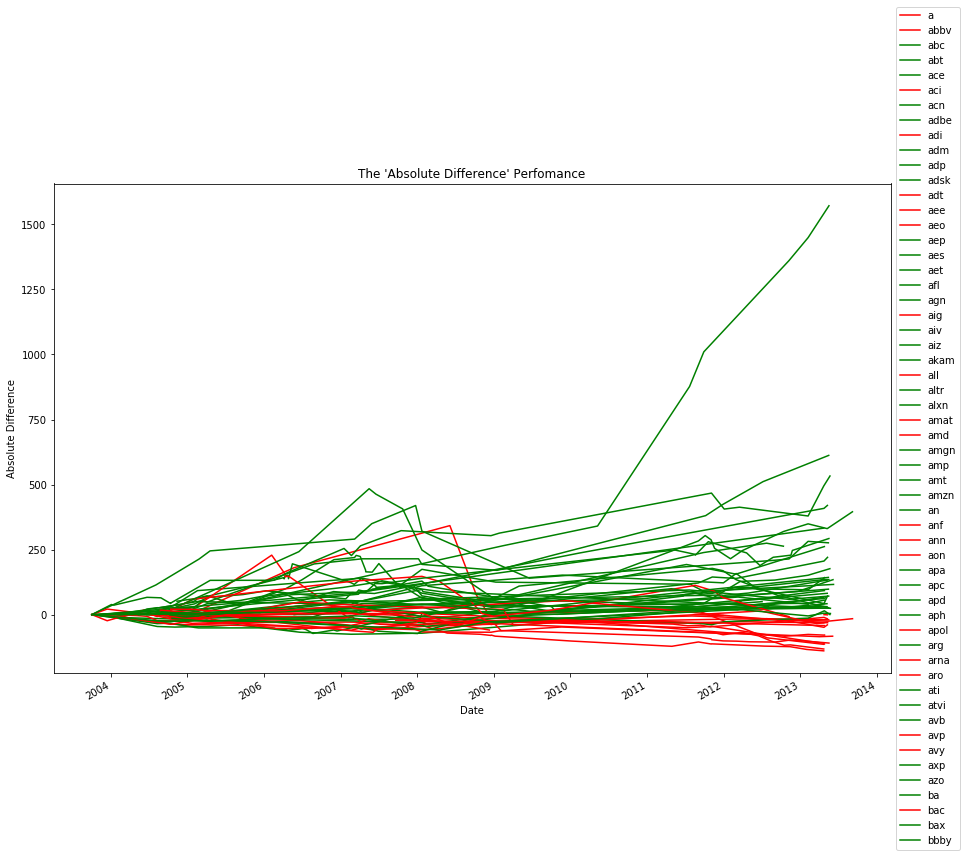

In [11]:
PlotFunctions.plot_df(res_df.loc[res_df.Ticker!='aapl'])

In [12]:

res_df.to_csv('agg60.csv',index=False)

In [ ]:
#res_df = pd.read_csv('agg60.csv')